# Case Study : Telecom Churn

## Problem Statement
- The telecommunications industry experiences an average of 15-25% annual churn rate
- Customer Retention has now become even more important than customer acquisition
- Retaining High Profitable Customers is the number one business goal
- Prepaid model Customer Churn in Indian and Southeast Asian market

## To Predict:
- Customer at high risk of churning
- Build predictive models to identify customers at high risk of churn and Identify the main indicators of churn.
- In this project we use, usage based churn

In [1]:
import pandas as pd
import numpy as np


from scipy import special 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.metrics import precision_score,f1_score
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier


In [4]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 300

In [5]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [6]:
churn_df = pd.read_csv("telecom_churn_data.csv")
churn_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [7]:
churn_df.shape

(99999, 226)

In [8]:
churn_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [9]:
churn_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

## Data Understanding and Cleaning

##### We can see that last 4 columns named with month value whereas, all other columns mentioned as month number. so converting the fields to be similar to the other fields

In [10]:
churn_df = churn_df.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 
                                    'jul_vbc_3g': 'vbc_3g_7', 
                                    'aug_vbc_3g': 'vbc_3g_8', 
                                    'sep_vbc_3g': 'vbc_3g_9'})
churn_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,

In [11]:
print(round(100*(churn_df.isnull().sum())/len(churn_df.index)))

mobile_number                0.0
circle_id                    0.0
loc_og_t2o_mou               1.0
std_og_t2o_mou               1.0
loc_ic_t2o_mou               1.0
last_date_of_month_6         0.0
last_date_of_month_7         1.0
last_date_of_month_8         1.0
last_date_of_month_9         2.0
arpu_6                       0.0
arpu_7                       0.0
arpu_8                       0.0
arpu_9                       0.0
onnet_mou_6                  4.0
onnet_mou_7                  4.0
onnet_mou_8                  5.0
onnet_mou_9                  8.0
offnet_mou_6                 4.0
offnet_mou_7                 4.0
offnet_mou_8                 5.0
offnet_mou_9                 8.0
roam_ic_mou_6                4.0
roam_ic_mou_7                4.0
roam_ic_mou_8                5.0
roam_ic_mou_9                8.0
roam_og_mou_6                4.0
roam_og_mou_7                4.0
roam_og_mou_8                5.0
roam_og_mou_9                8.0
loc_og_t2t_mou_6             4.0
loc_og_t2t

    - We can see that lot of columns has the missing value above 70%. 
    - We also see that many columns which needed for analysis as well has lot of missing data which needs to be imputed

- We need to find the 'High value Customers' since customer retention should be taken more care for the high value customers first
    - We consider 6,7th month as <b>Good phase</b>
    - We consider 9th month as <b> Churn Phase </b>

- Now lets do Data cleaning for the month 6,7,8,9 columns first.

##### We need to create a new column (Target) who will Churn or not. The Churn will be assigned with 1 and no Churn as 0.
- We will take the fields 'vol_3g_mb_9', 'vol_2g_mb_9','total_ic_mou_9','total_og_mou_9' for the new field creation.
- 'vol_3g_mb_9', 'vol_2g_mb_9' represent data
- 'total_ic_mou_9','total_og_mou_9' represent incoming and outgoing calls. All these fields are used for the Target variable creation with the classification as Churn or no Churn

In [12]:
churn_df[['vol_3g_mb_9', 'vol_2g_mb_9','total_ic_mou_9','total_og_mou_9']].isnull().sum()

vol_3g_mb_9       0
vol_2g_mb_9       0
total_ic_mou_9    0
total_og_mou_9    0
dtype: int64

In [13]:
churn_df[['vol_3g_mb_9', 'vol_2g_mb_9','total_ic_mou_9','total_og_mou_9']].head()

,vol_3g_mb_9,vol_2g_mb_9,total_ic_mou_9,total_og_mou_9
0,0.00,0.0,0.00,0.00
1,0.00,0.0,188.04,72.11
2,8.42,0.0,517.74,124.94
3,0.00,0.0,305.38,362.54
4,0.00,0.0,205.31,104.59


In [14]:
churn_df[['vol_3g_mb_9', 'vol_2g_mb_9','total_ic_mou_9','total_og_mou_9']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   vol_3g_mb_9     99999 non-null  float64
 1   vol_2g_mb_9     99999 non-null  float64
 2   total_ic_mou_9  99999 non-null  float64
 3   total_og_mou_9  99999 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


In [15]:
churn_cols = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9','vol_3g_mb_9']
churn_df['Target_churn'] = churn_df[churn_cols].apply(lambda x: 1 if ((x['vol_3g_mb_9']==0.0) &
                                                                      (x['vol_2g_mb_9']==0.0) & 
                                                                      (x['total_ic_mou_9']==0.0)  & 
                                                                      (x['total_og_mou_9']==0)) else 0, axis=1)
churn_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,Target_churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN

New Column 'Target_churn' is created with binary classification for churn / no churn

In [16]:
churn_df['Target_churn'].value_counts()

0    89808
1    10191
Name: Target_churn, dtype: int64

In [17]:
#### Checking the % value of the data present
(churn_df['Target_churn'].value_counts()/len(churn_df))*100

0    89.808898
1    10.191102
Name: Target_churn, dtype: float64

- We can clearly see imbalance in data is present.
- We can fix the Class imbalance using few techniques like Up-Sampling, Down-Sampling, SMOTE which we will look into in modelling section

<AxesSubplot:>

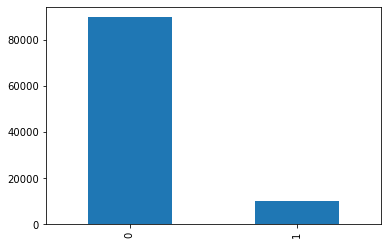

In [18]:
churn_df['Target_churn'].value_counts().plot.bar()

#### Since the churn phase is considered as month of 9, lets remove the fields which belongs to the month of september

In [19]:
churnPhase_9_cols = ['last_date_of_month_9','arpu_9','onnet_mou_9','offnet_mou_9','roam_ic_mou_9','roam_og_mou_9',
                    'loc_og_t2t_mou_9','loc_og_t2m_mou_9','loc_og_t2f_mou_9','loc_og_t2c_mou_9','loc_og_mou_9',
                    'std_og_t2t_mou_9','std_og_t2m_mou_9','std_og_t2f_mou_9','std_og_t2c_mou_9','std_og_mou_9',
                    'isd_og_mou_9','spl_og_mou_9','og_others_9','total_og_mou_9','loc_ic_t2t_mou_9','loc_ic_t2m_mou_9',
                    'loc_ic_t2f_mou_9','loc_ic_mou_9','std_ic_t2t_mou_9','std_ic_t2m_mou_9','std_ic_t2f_mou_9',
                    'std_ic_t2o_mou_9','std_ic_mou_9','total_ic_mou_9','spl_ic_mou_9','isd_ic_mou_9','ic_others_9',
                    'total_rech_num_9','total_rech_amt_9','max_rech_amt_9','date_of_last_rech_9','last_day_rch_amt_9',
                    'date_of_last_rech_data_9','total_rech_data_9','max_rech_data_9','count_rech_2g_9','count_rech_3g_9',
                    'av_rech_amt_data_9','vol_2g_mb_9','vol_3g_mb_9','arpu_3g_9','arpu_2g_9','night_pck_user_9',
                    'monthly_2g_9','sachet_2g_9','monthly_3g_9','sachet_3g_9','fb_user_9','vbc_3g_9']

In [20]:
churn_df.drop(churnPhase_9_cols,axis=1,inplace=True)

In [21]:
churn_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,Target_churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.4,0.0,101.20,1
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,34.047,355.074,268.321,24.11,78.68,7.68,15.74,99.84,304.76,0.0,0.00,0.00,0.0,0.00,0.00,23.88,74.56,7.68,11.51,75.94,291.86,0.00,0.00,0.00,0.0,2.91,0.00,35.39,150.51,299.54,0.23,4.11,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.0,0.0,0.0,0.23,4.58,0.13,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.0,0.0,40.31,178.53,312.44,1.61,29.91,29.23,17.48,65.38,375.58,0.00,8.93,3.61,19.09,104.23,408.43,0.00,0.00,2.35,5.90,0.00,12.49,0.00,0.00,0.00,0.0,0.0,0.0,5.90,0.00,14.84,26.83,104.23,423.28,0.00,0.0,0.0,1.83,0.00,0.0,0.00,0.00,0.0,4,9,11,74,384,283,44,154,65,6/29/2014,7/31/2014,8/28/2014,44,23,30,NaN,7/

In [22]:
churn_df.shape

(99999, 172)

- For combining the 2 columns, the null value should not be present, hence imputing the required value to 0
        - We can see that data recharge is in 2 columns 2G and 3G, we can sum it up to one field, 
        so lets impute these fields first

In [23]:
## We have taken the data column which is 2G and 3G
churn_df[['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8']].isnull().sum()

count_rech_2g_6    74846
count_rech_2g_7    74428
count_rech_2g_8    73660
count_rech_3g_6    74846
count_rech_3g_7    74428
count_rech_3g_8    73660
dtype: int64

In [24]:
### Percentage null value
(churn_df[['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8']].isnull().sum()/len(churn_df))*100

count_rech_2g_6    74.846748
count_rech_2g_7    74.428744
count_rech_2g_8    73.660737
count_rech_3g_6    74.846748
count_rech_3g_7    74.428744
count_rech_3g_8    73.660737
dtype: float64

- more than 70% data is missing, however we need this field for our computation, so will impute it with 0

In [25]:
churn_df[['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8']] = churn_df[['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8']].fillna(0, axis=1)

In [26]:
### We can see that data recharge is in 2 columns 2G and 3G, we can sum it up to one field
churn_df['count_rech_data_6'] = (churn_df['count_rech_2g_6']+churn_df['count_rech_3g_6']).astype(int)
churn_df['count_rech_data_7'] = (churn_df['count_rech_2g_7']+churn_df['count_rech_3g_7']).astype(int)
churn_df['count_rech_data_8'] = (churn_df['count_rech_2g_8']+churn_df['count_rech_3g_8']).astype(int)
churn_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,Target_churn,count_rech_data_6,count_rech_data_7,count_rech_data_8
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.4,0.0,101.20,1,1,1,1
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,34.047,355.074,268.321,24.11,78.68,7.68,15.74,99.84,304.76,0.0,0.00,0.00,0.0,0.00,0.00,23.88,74.56,7.68,11.51,75.94,291.86,0.00,0.00,0.00,0.0,2.91,0.00,35.39,150.51,299.54,0.23,4.11,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.0,0.0,0.0,0.23,4.58,0.13,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.0,0.0,40.31,178.53,312.44,1.61,29.91,29.23,17.48,65.38,375.58,0.00,8.93,3.61,19.09,104.23,408.43,0.00,0.00,2.35,5.90,0.00,12.49,0.00,0.00,0.00,0.0,0.0,0.0,5.90,0.00,14.84,26.83,104.23,423.28,0.00,0.0,0.0,1.83,0.00,0.0,0.00,0.00,0.0,4,9,11,74,384

##### We now need to calculate the recharging amount in the month so we multiply 'count_rech_data_*' and 'av_rech_amt_data_*'

In [27]:
## We need to impute the null value to 0.
churn_df[['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']] = churn_df[['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']].fillna(0, axis=1) 

In [28]:
churn_df['total_rechamt_data_6'] = churn_df['count_rech_data_6']*churn_df['av_rech_amt_data_6']
churn_df['total_rechamt_data_7'] = churn_df['count_rech_data_7']*churn_df['av_rech_amt_data_7']
churn_df['total_rechamt_data_8'] = churn_df['count_rech_data_8']*churn_df['av_rech_amt_data_8']
churn_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,Target_churn,count_rech_data_6,count_rech_data_7,count_rech_data_8,total_rechamt_data_6,total_rechamt_data_7,total_rechamt_data_8
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.4,0.0,101.20,1,1,1,1,252.0,252.0,252.0
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,34.047,355.074,268.321,24.11,78.68,7.68,15.74,99.84,304.76,0.0,0.00,0.00,0.0,0.00,0.00,23.88,74.56,7.68,11.51,75.94,291.86,0.00,0.00,0.00,0.0,2.91,0.00,35.39,150.51,299.54,0.23,4.11,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.0,0.0,0.0,0.23,4.58,0.13,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.0,0.0,40.31,178.53,312.44,1.61,29.91,29.23,17.48,65.38,375.58,0.00,8.93,3.61,19.09,104.23,408.43,0.00,0.00,2.35,5.90,0.00,12.49,0.00,0.00,0.00,0.0,0.0,0.0,5.90,0.00

In [29]:
### The total recharge amount made for incoming and outgoing calls are in the below columns
churn_df[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']]

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8
0,362,252,252
1,74,384,283
2,168,315,116
3,230,310,601
4,196,350,287
...,...,...,...
99994,60,110,0
99995,110,110,182
99996,119,0,0
99997,381,358,716


- We need to calculate the Total charge for the customer which is the sum of the total recharge amount for calls and total recharge amount for data.

In [30]:
churn_df['total_charge_mnth_6'] = churn_df['total_rech_amt_6'] + churn_df['total_rechamt_data_6']
churn_df['total_charge_mnth_7'] = churn_df['total_rech_amt_7'] + churn_df['total_rechamt_data_7']
churn_df['total_charge_mnth_8'] = churn_df['total_rech_amt_8'] + churn_df['total_rechamt_data_8']
churn_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,Target_churn,count_rech_data_6,count_rech_data_7,count_rech_data_8,total_rechamt_data_6,total_rechamt_data_7,total_rechamt_data_8,total_charge_mnth_6,total_charge_mnth_7,total_charge_mnth_8
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.4,0.0,101.20,1,1,1,1,252.0,252.0,252.0,614.0,504.0,504.0
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,34.047,355.074,268.321,24.11,78.68,7.68,15.74,99.84,304.76,0.0,0.00,0.00,0.0,0.00,0.00,23.88,74.56,7.68,11.51,75.94,291.86,0.00,0.00,0.00,0.0,2.91,0.00,35.39,150.51,299.54,0.23,4.11,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.0,0.0,0.0,0.23,4.58,0.13,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.0,0.0,40.31,178.53,312.44,1.61,29.91,29.23,17.48,65.38,375.58,0.00,8.93,3.61,19.09,104

In [31]:
churn_df.shape

(99999, 181)

- We have now derived the 'Total_Charge_Mnth' for the 6,7,8,months. We can remove the features from which the derived features are obtained

In [32]:
derived_cols = ['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8',
               'count_rech_data_6','count_rech_data_7','count_rech_data_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8',
               'total_rechamt_data_6','total_rechamt_data_7','total_rechamt_data_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']

In [33]:
churn_df.drop(derived_cols,axis=1,inplace=True)

In [34]:
churn_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,Target_churn,total_charge_mnth_6,total_charge_mnth_7,total_charge_mnth_8
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,4,3,2,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.4,0.0,101.20,1,614.0,504.0,504.0
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,34.047,355.074,268.321,24.11,78.68,7.68,15.74,99.84,304.76,0.0,0.00,0.00,0.0,0.00,0.00,23.88,74.56,7.68,11.51,75.94,291.86,0.00,0.00,0.00,0.0,2.91,0.00,35.39,150.51,299.54,0.23,4.11,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.0,0.0,0.0,0.23,4.58,0.13,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.0,0.0,40.31,178.53,312.44,1.61,29.91,29.23,17.48,65.38,375.58,0.00,8.93,3.61,19.09,104.23,408.43,0.00,0.00,2.35,5.90,0.00,12.49,0.00,0.00,0.00,0.0,0.0,0.0,5.90,0.00,14.84,26.83,104.23,423.28,0.00,0.0,0.0,1.83,0.00,0.0,0.00,0.00,0.0,4,9,11,44,154,65,6/29/2014,7/31/2014,8/28/2014,44,23,30,NaN,7/25/2014,8/10/2014,NaN,1.0,2.0,NaN,154.0,25.0,0.00,108.07,365.47,0.00,0.00,0.00,NaN,0.00,0.00,NaN,28.61,7.60,NaN,0.0,0.0,0,1,0,0,0,2,0,0,0,0,0,0,NaN,1.0,1.0,1006,0.0,0.0,0.00,0,74.0,538.0,383.

In [35]:
churn_df.shape

(99999, 163)

##### Since we dont want the circle_id and mobile_number lets drop those fields

In [36]:
churn_df.drop(['circle_id','mobile_number'],axis=1,inplace=True)

In [37]:
churn_df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,Target_churn,total_charge_mnth_6,total_charge_mnth_7,total_charge_mnth_8
0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,4,3,2,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.4,0.0,101.20,1,614.0,504.0,504.0
1,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,34.047,355.074,268.321,24.11,78.68,7.68,15.74,99.84,304.76,0.0,0.00,0.00,0.0,0.00,0.00,23.88,74.56,7.68,11.51,75.94,291.86,0.00,0.00,0.00,0.0,2.91,0.00,35.39,150.51,299.54,0.23,4.11,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.0,0.0,0.0,0.23,4.58,0.13,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.0,0.0,40.31,178.53,312.44,1.61,29.91,29.23,17.48,65.38,375.58,0.00,8.93,3.61,19.09,104.23,408.43,0.00,0.00,2.35,5.90,0.00,12.49,0.00,0.00,0.00,0.0,0.0,0.0,5.90,0.00,14.84,26.83,104.23,423.28,0.00,0.0,0.0,1.83,0.00,0.0,0.00,0.00,0.0,4,9,11,44,154,65,6/29/2014,7/31/2014,8/28/2014,44,23,30,NaN,7/25/2014,8/10/2014,NaN,1.0,2.0,NaN,154.0,25.0,0.00,108.07,365.47,0.00,0.00,0.00,NaN,0.00,0.00,NaN,28.61,7.60,NaN,0.0,0.0,0,1,0,0,0,2,0,0,0,0,0,0,NaN,1.0,1.0,1006,0.0,0.0,0.00,0,74.0,538.0,383.0
2,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,167.690,

In [38]:
churn_df.shape

(99999, 161)

In [39]:
churn_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 161 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   loc_og_t2o_mou            float64
 1   std_og_t2o_mou            float64
 2   loc_ic_t2o_mou            float64
 3   last_date_of_month_6      object 
 4   last_date_of_month_7      object 
 5   last_date_of_month_8      object 
 6   arpu_6                    float64
 7   arpu_7                    float64
 8   arpu_8                    float64
 9   onnet_mou_6               float64
 10  onnet_mou_7               float64
 11  onnet_mou_8               float64
 12  offnet_mou_6              float64
 13  offnet_mou_7              float64
 14  offnet_mou_8              float64
 15  roam_ic_mou_6             float64
 16  roam_ic_mou_7             float64
 17  roam_ic_mou_8             float64
 18  roam_og_mou_6             float64
 19  roam_og_mou_7             float64
 20  roam_og_mou_8             f

#### High Value Customer Extraction

In [40]:
### The high value customersdata is extracted based on the average recharge amount in the first two months(6,7) which is considered as good phase.
churn_newdf=churn_df[churn_df[['total_charge_mnth_6','total_charge_mnth_7']].mean(axis=1)> 
                     churn_df[['total_charge_mnth_6','total_charge_mnth_7']].mean(axis=1).quantile(0.7)]

In [41]:
churn_newdf.shape

(29953, 161)

In [42]:
churn_newdf['Target_churn'].value_counts()/len(churn_newdf)*100

0    91.877274
1     8.122726
Name: Target_churn, dtype: float64

In [43]:
# The date columns are not in datetimeformat. Hence converting it
churn_newdf['last_date_of_month_6'] = pd.to_datetime(churn_newdf['last_date_of_month_6'], format='%m/%d/%Y')
churn_newdf['last_date_of_month_7'] = pd.to_datetime(churn_newdf['last_date_of_month_7'], format='%m/%d/%Y')
churn_newdf['last_date_of_month_8'] = pd.to_datetime(churn_newdf['last_date_of_month_8'], format='%m/%d/%Y')
churn_newdf['date_of_last_rech_6'] = pd.to_datetime(churn_newdf['date_of_last_rech_6'], format='%m/%d/%Y')
churn_newdf['date_of_last_rech_7'] = pd.to_datetime(churn_newdf['date_of_last_rech_7'], format='%m/%d/%Y')
churn_newdf['date_of_last_rech_8'] = pd.to_datetime(churn_newdf['date_of_last_rech_8'], format='%m/%d/%Y')
churn_newdf['date_of_last_rech_data_6'] = pd.to_datetime(churn_newdf['date_of_last_rech_data_6'], format='%m/%d/%Y')
churn_newdf['date_of_last_rech_data_7'] = pd.to_datetime(churn_newdf['date_of_last_rech_data_7'], format='%m/%d/%Y')
churn_newdf['date_of_last_rech_data_8'] = pd.to_datetime(churn_newdf['date_of_last_rech_data_8'], format='%m/%d/%Y')

In [44]:
churn_newdf.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,Target_churn,total_charge_mnth_6,total_charge_mnth_7,total_charge_mnth_8
0,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,252,252,252,2014-06-21,2014-07-16,2014-08-08,252,252,252,2014-06-21,2014-07-16,2014-08-08,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,1,614.0,504.0,504.0
7,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,1580,2014-06-27,2014-07-25,2014-08-26,0,0,779,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,802,57.74,19.38,18.74,1,158

In [45]:
round(churn_newdf.isnull().sum()/len(churn_newdf)*100,2)

loc_og_t2o_mou               0.74
std_og_t2o_mou               0.74
loc_ic_t2o_mou               0.74
last_date_of_month_6         0.00
last_date_of_month_7         0.09
last_date_of_month_8         0.55
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  1.81
onnet_mou_7                  1.79
onnet_mou_8                  3.91
offnet_mou_6                 1.81
offnet_mou_7                 1.79
offnet_mou_8                 3.91
roam_ic_mou_6                1.81
roam_ic_mou_7                1.79
roam_ic_mou_8                3.91
roam_og_mou_6                1.81
roam_og_mou_7                1.79
roam_og_mou_8                3.91
loc_og_t2t_mou_6             1.81
loc_og_t2t_mou_7             1.79
loc_og_t2t_mou_8             3.91
loc_og_t2m_mou_6             1.81
loc_og_t2m_mou_7             1.79
loc_og_t2m_mou_8             3.91
loc_og_t2f_mou_6             1.81
loc_og_t2f_mou_7             1.79
loc_og_t2f_mou

##### The following fields have only 0 and blanks as values. These fields are not going to help for analysis.
##### Hence removing these fields

In [46]:
churn_newdf.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7',
                 'std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'],inplace=True,axis=1)

In [47]:
churn_newdf.shape

(29953, 152)

In [48]:
round(churn_newdf.isnull().sum()/len(churn_newdf)*100,2)

last_date_of_month_6         0.00
last_date_of_month_7         0.09
last_date_of_month_8         0.55
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  1.81
onnet_mou_7                  1.79
onnet_mou_8                  3.91
offnet_mou_6                 1.81
offnet_mou_7                 1.79
offnet_mou_8                 3.91
roam_ic_mou_6                1.81
roam_ic_mou_7                1.79
roam_ic_mou_8                3.91
roam_og_mou_6                1.81
roam_og_mou_7                1.79
roam_og_mou_8                3.91
loc_og_t2t_mou_6             1.81
loc_og_t2t_mou_7             1.79
loc_og_t2t_mou_8             3.91
loc_og_t2m_mou_6             1.81
loc_og_t2m_mou_7             1.79
loc_og_t2m_mou_8             3.91
loc_og_t2f_mou_6             1.81
loc_og_t2f_mou_7             1.79
loc_og_t2f_mou_8             3.91
loc_og_t2c_mou_6             1.81
loc_og_t2c_mou_7             1.79
loc_og_t2c_mou

In [49]:
round(100*(churn_newdf.isnull().sum()/len(churn_newdf.index)), 2)[round(churn_newdf.isnull().sum()/len(churn_newdf.index), 2).values > 0.00].sort_values(ascending=False)

fb_user_8                   46.80
date_of_last_rech_data_8    46.80
night_pck_user_8            46.80
total_rech_data_8           46.80
arpu_2g_8                   46.80
max_rech_data_8             46.80
arpu_3g_8                   46.80
arpu_3g_6                   44.11
total_rech_data_6           44.11
max_rech_data_6             44.11
date_of_last_rech_data_6    44.11
night_pck_user_6            44.11
fb_user_6                   44.11
arpu_2g_6                   44.11
arpu_3g_7                   43.12
max_rech_data_7             43.12
arpu_2g_7                   43.12
total_rech_data_7           43.12
night_pck_user_7            43.12
date_of_last_rech_data_7    43.12
fb_user_7                   43.12
isd_og_mou_8                 3.91
std_og_t2f_mou_8             3.91
std_og_mou_8                 3.91
loc_ic_t2m_mou_8             3.91
spl_og_mou_8                 3.91
og_others_8                  3.91
std_og_t2t_mou_8             3.91
std_og_t2m_mou_8             3.91
loc_og_t2t_mou

- We will remove the data which has more than 45%

In [50]:
rem_cols = ['fb_user_8','date_of_last_rech_data_8','night_pck_user_8','total_rech_data_8','arpu_2g_8','max_rech_data_8','arpu_3g_8']

In [51]:
churn_newdf.drop(rem_cols,axis=1,inplace=True)
churn_newdf.head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,total_rech_data_6,total_rech_data_7,max_rech_data_6,max_rech_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_2g_6,arpu_2g_7,night_pck_user_6,night_pck_user_7,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,Target_churn,total_charge_mnth_6,total_charge_mnth_7,total_charge_mnth_8
0,2014-06-30,2014-07-31,2014-08-31,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,252,252,252,2014-06-21,2014-07-16,2014-08-08,252,252,252,2014-06-21,2014-07-16,1.0,1.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,968,30.40,0.00,101.20,1,614.0,504.0,504.0
7,2014-06-30,2014-07-31,2014-08-31,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,1580,2014-06-27,2014-07-25,2014-08-26,0,0,779,NaT,NaT,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,802,57.74,19.38,18.74,1,1580.0,790.0,3638.0
8,2014-06-30,2014-07-31,2014-08-31,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.

In [52]:
round(100*(churn_newdf.isnull().sum()/len(churn_newdf.index)), 2)[round(churn_newdf.isnull().sum()/len(churn_newdf.index), 2).values > 0.00].sort_values(ascending=False)

total_rech_data_6           44.11
max_rech_data_6             44.11
fb_user_6                   44.11
night_pck_user_6            44.11
date_of_last_rech_data_6    44.11
arpu_2g_6                   44.11
arpu_3g_6                   44.11
date_of_last_rech_data_7    43.12
total_rech_data_7           43.12
fb_user_7                   43.12
max_rech_data_7             43.12
arpu_3g_7                   43.12
arpu_2g_7                   43.12
night_pck_user_7            43.12
std_og_t2t_mou_8             3.91
loc_ic_t2m_mou_8             3.91
loc_ic_t2t_mou_8             3.91
spl_og_mou_8                 3.91
isd_og_mou_8                 3.91
std_og_mou_8                 3.91
std_og_t2f_mou_8             3.91
std_og_t2m_mou_8             3.91
roam_ic_mou_8                3.91
loc_og_mou_8                 3.91
loc_og_t2c_mou_8             3.91
loc_og_t2f_mou_8             3.91
loc_og_t2m_mou_8             3.91
loc_og_t2t_mou_8             3.91
roam_og_mou_8                3.91
loc_ic_mou_8  

In [53]:
## Imputing the Total_Rech_data column to 0
churn_newdf[['total_rech_data_6','total_rech_data_7','max_rech_data_6','max_rech_data_7','fb_user_6','fb_user_7','night_pck_user_6','night_pck_user_7','arpu_3g_6','arpu_3g_7','arpu_2g_6','arpu_2g_7']]=churn_newdf[['total_rech_data_6','total_rech_data_7','max_rech_data_6','max_rech_data_7','fb_user_6','fb_user_7','night_pck_user_6','night_pck_user_7','arpu_3g_6','arpu_3g_7','arpu_2g_6','arpu_2g_7']].fillna(0, axis=1)
round(100*(churn_newdf.isnull().sum()/len(churn_newdf.index)), 2)[round(churn_newdf.isnull().sum()/len(churn_newdf.index), 2).values > 0.00].sort_values(ascending=False)

date_of_last_rech_data_6    44.11
date_of_last_rech_data_7    43.12
std_og_t2t_mou_8             3.91
loc_ic_t2m_mou_8             3.91
loc_ic_t2t_mou_8             3.91
og_others_8                  3.91
spl_og_mou_8                 3.91
std_og_mou_8                 3.91
std_og_t2f_mou_8             3.91
std_og_t2m_mou_8             3.91
loc_og_mou_8                 3.91
loc_ic_mou_8                 3.91
loc_og_t2c_mou_8             3.91
loc_og_t2f_mou_8             3.91
loc_og_t2m_mou_8             3.91
loc_og_t2t_mou_8             3.91
roam_og_mou_8                3.91
roam_ic_mou_8                3.91
offnet_mou_8                 3.91
onnet_mou_8                  3.91
loc_ic_t2f_mou_8             3.91
isd_og_mou_8                 3.91
isd_ic_mou_8                 3.91
spl_ic_mou_8                 3.91
std_ic_t2t_mou_8             3.91
ic_others_8                  3.91
std_ic_mou_8                 3.91
std_ic_t2f_mou_8             3.91
std_ic_t2m_mou_8             3.91
date_of_last_r

In [54]:
churn_newdf = churn_newdf.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis=1)

In [55]:
round(100*(churn_newdf.isnull().sum()/len(churn_newdf.index)), 2)[round(churn_newdf.isnull().sum()/len(churn_newdf.index), 2).values > 0.00].sort_values(ascending=False)

ic_others_8             3.91
std_ic_t2t_mou_8        3.91
std_og_t2f_mou_8        3.91
spl_og_mou_8            3.91
std_og_t2m_mou_8        3.91
og_others_8             3.91
std_og_t2t_mou_8        3.91
loc_ic_t2t_mou_8        3.91
loc_og_mou_8            3.91
loc_ic_t2m_mou_8        3.91
loc_og_t2c_mou_8        3.91
loc_ic_t2f_mou_8        3.91
loc_og_t2f_mou_8        3.91
loc_ic_mou_8            3.91
std_og_mou_8            3.91
loc_og_t2m_mou_8        3.91
isd_og_mou_8            3.91
std_ic_t2m_mou_8        3.91
roam_og_mou_8           3.91
std_ic_t2f_mou_8        3.91
isd_ic_mou_8            3.91
roam_ic_mou_8           3.91
std_ic_mou_8            3.91
loc_og_t2t_mou_8        3.91
onnet_mou_8             3.91
offnet_mou_8            3.91
spl_ic_mou_8            3.91
loc_og_t2m_mou_6        1.81
offnet_mou_6            1.81
std_og_mou_6            1.81
onnet_mou_6             1.81
std_og_t2f_mou_6        1.81
roam_ic_mou_6           1.81
std_og_t2m_mou_6        1.81
std_og_t2t_mou

In [56]:
churn_newdf['loc_ic_t2t_mou_8'].value_counts()

0.00      2540
0.36        29
0.66        28
0.53        26
0.58        26
          ... 
390.69       1
180.81       1
179.28       1
369.48       1
9.25         1
Name: loc_ic_t2t_mou_8, Length: 9359, dtype: int64

In [57]:
change_cols = ['loc_ic_t2t_mou_8','ic_others_8','loc_ic_t2f_mou_8','roam_ic_mou_8','loc_ic_t2m_mou_8','og_others_8','roam_og_mou_8',
'spl_og_mou_8','isd_og_mou_8','std_og_mou_8','std_ic_t2t_mou_8','std_og_t2f_mou_8','loc_og_t2t_mou_8','std_og_t2m_mou_8',
'std_og_t2t_mou_8','loc_og_mou_8','loc_og_t2m_mou_8','loc_og_t2c_mou_8','loc_ic_mou_8','loc_og_t2f_mou_8','std_ic_mou_8',
'std_ic_t2f_mou_8','isd_ic_mou_8','spl_ic_mou_8','onnet_mou_8','offnet_mou_8','std_ic_t2m_mou_8']

In [58]:
churn_newdf[change_cols]=churn_newdf[change_cols].replace(np.nan, 0)

In [59]:
### The date column for null value imputation has null values in 'last_date_of_month_7','last_date_of_month_8', 
### We can see that the column is the last date of that particular month
print(churn_newdf['last_date_of_month_7'].unique())
print(churn_newdf['last_date_of_month_8'].unique())

['2014-07-31T00:00:00.000000000'                           'NaT']
['2014-08-31T00:00:00.000000000'                           'NaT']


In [60]:
values = {'last_date_of_month_7': pd.to_datetime('2014-07-31T00:00:00.000000000'), 
          'last_date_of_month_8': pd.to_datetime('2014-08-31T00:00:00.000000000')}
churn_newdf = churn_newdf.fillna(value=values)
print(churn_newdf['last_date_of_month_7'].unique())
print(churn_newdf['last_date_of_month_8'].unique())

['2014-07-31T00:00:00.000000000']
['2014-08-31T00:00:00.000000000']


In [61]:
round(churn_newdf.isnull().sum()/len(churn_newdf.index), 2)

last_date_of_month_6    0.00
last_date_of_month_7    0.00
last_date_of_month_8    0.00
arpu_6                  0.00
arpu_7                  0.00
arpu_8                  0.00
onnet_mou_6             0.02
onnet_mou_7             0.02
onnet_mou_8             0.00
offnet_mou_6            0.02
offnet_mou_7            0.02
offnet_mou_8            0.00
roam_ic_mou_6           0.02
roam_ic_mou_7           0.02
roam_ic_mou_8           0.00
roam_og_mou_6           0.02
roam_og_mou_7           0.02
roam_og_mou_8           0.00
loc_og_t2t_mou_6        0.02
loc_og_t2t_mou_7        0.02
loc_og_t2t_mou_8        0.00
loc_og_t2m_mou_6        0.02
loc_og_t2m_mou_7        0.02
loc_og_t2m_mou_8        0.00
loc_og_t2f_mou_6        0.02
loc_og_t2f_mou_7        0.02
loc_og_t2f_mou_8        0.00
loc_og_t2c_mou_6        0.02
loc_og_t2c_mou_7        0.02
loc_og_t2c_mou_8        0.00
loc_og_mou_6            0.02
loc_og_mou_7            0.02
loc_og_mou_8            0.00
std_og_t2t_mou_6        0.02
std_og_t2t_mou

In [62]:
### We see all the missing values are in the columns for 6,7,8 month columns. 
### Since we need this column for our analysis, we will make the values to 0

churn_newdf = churn_newdf.replace(np.nan, 0)

In [63]:
round(churn_newdf.isnull().sum()/len(churn_newdf.index), 2)

last_date_of_month_6    0.0
last_date_of_month_7    0.0
last_date_of_month_8    0.0
arpu_6                  0.0
arpu_7                  0.0
arpu_8                  0.0
onnet_mou_6             0.0
onnet_mou_7             0.0
onnet_mou_8             0.0
offnet_mou_6            0.0
offnet_mou_7            0.0
offnet_mou_8            0.0
roam_ic_mou_6           0.0
roam_ic_mou_7           0.0
roam_ic_mou_8           0.0
roam_og_mou_6           0.0
roam_og_mou_7           0.0
roam_og_mou_8           0.0
loc_og_t2t_mou_6        0.0
loc_og_t2t_mou_7        0.0
loc_og_t2t_mou_8        0.0
loc_og_t2m_mou_6        0.0
loc_og_t2m_mou_7        0.0
loc_og_t2m_mou_8        0.0
loc_og_t2f_mou_6        0.0
loc_og_t2f_mou_7        0.0
loc_og_t2f_mou_8        0.0
loc_og_t2c_mou_6        0.0
loc_og_t2c_mou_7        0.0
loc_og_t2c_mou_8        0.0
loc_og_mou_6            0.0
loc_og_mou_7            0.0
loc_og_mou_8            0.0
std_og_t2t_mou_6        0.0
std_og_t2t_mou_7        0.0
std_og_t2t_mou_8    

## Data Visualization

In [64]:
churn_newdf.columns.values

array(['last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'arpu_6', 'arpu_7', 'arpu_8',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6',
       'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 's

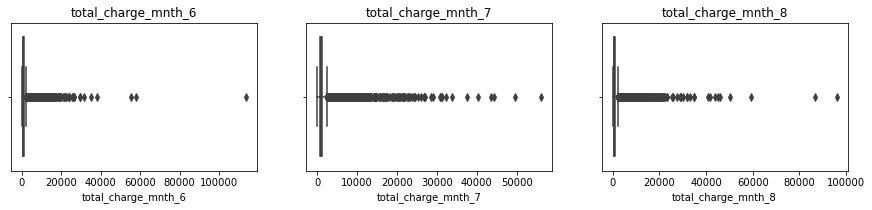

In [65]:
## Plot to check the data for Total Charge Month
plt.figure(figsize=(15,6))

# Plot 1
plt.subplot(2, 3, 1)
sns.boxplot(churn_newdf['total_charge_mnth_6'])
plt.title('total_charge_mnth_6')
# Plot 2
plt.subplot(2, 3, 2)
sns.boxplot(churn_newdf['total_charge_mnth_7'])
plt.title('total_charge_mnth_7')
# Plot 3
plt.subplot(2, 3, 3)
sns.boxplot(churn_newdf['total_charge_mnth_8'])
plt.title('total_charge_mnth_8')
plt.show()


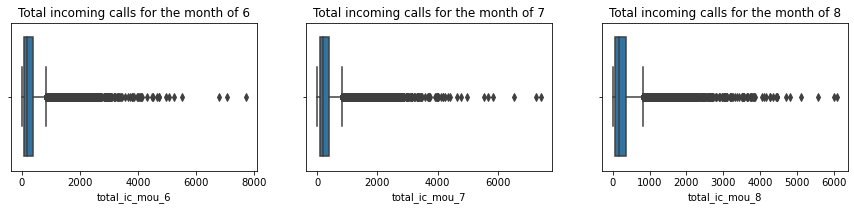

In [66]:
# Plot to check the Total incoming calls
plt.figure(figsize=(15,6))
# Plot 1
plt.subplot(2, 3, 1)
sns.boxplot(churn_newdf['total_ic_mou_6'])
plt.title('Total incoming calls for the month of 6')
# Plot 2
plt.subplot(2, 3, 2)
sns.boxplot(churn_newdf['total_ic_mou_7'])
plt.title('Total incoming calls for the month of 7')
# Plot 3
plt.subplot(2, 3, 3)
sns.boxplot(churn_newdf['total_ic_mou_8'])
plt.title('Total incoming calls for the month of 8')
plt.show()

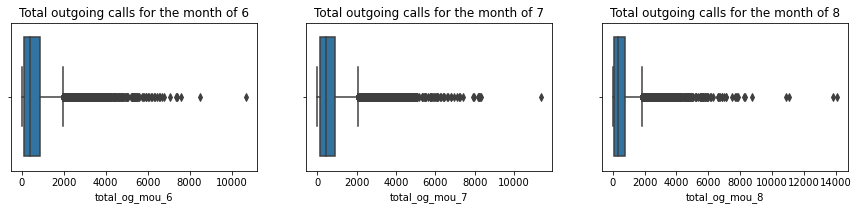

In [67]:
# Plot to check the Total outgoing calls
plt.figure(figsize=(15,6))
# Plot 1
plt.subplot(2, 3, 1)
sns.boxplot(churn_newdf['total_og_mou_6'])
plt.title('Total outgoing calls for the month of 6')
# Plot 2
plt.subplot(2, 3, 2)
sns.boxplot(churn_newdf['total_og_mou_7'])
plt.title('Total outgoing calls for the month of 7')
# Plot 3
plt.subplot(2, 3, 3)
sns.boxplot(churn_newdf['total_og_mou_8'])
plt.title('Total outgoing calls for the month of 8')
plt.show()

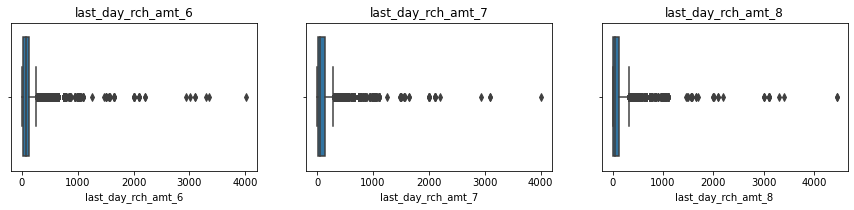

In [68]:
# Plot to check the Recharge Amount
plt.figure(figsize=(15,6))
# Plot 1
plt.subplot(2, 3, 1)
sns.boxplot(churn_newdf['last_day_rch_amt_6'])
plt.title('last_day_rch_amt_6')
# Plot 2
plt.subplot(2, 3, 2)
sns.boxplot(churn_newdf['last_day_rch_amt_7'])
plt.title('last_day_rch_amt_7')
# Plot 3
plt.subplot(2, 3, 3)
sns.boxplot(churn_newdf['last_day_rch_amt_8'])
plt.title('last_day_rch_amt_8')
plt.show()

Text(0.5, 1.0, 'number of days the customer is using the operator')

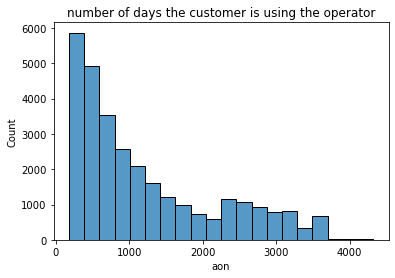

In [69]:
sns.histplot(churn_newdf['aon'],bins=20)
plt.title('number of days the customer is using the operator')

<AxesSubplot:xlabel='Target_churn', ylabel='count'>

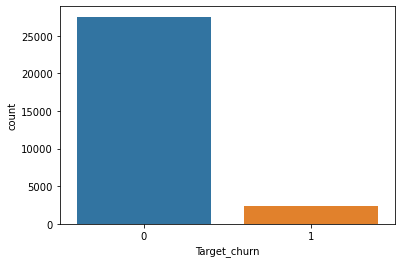

In [70]:
sns.countplot(data=churn_newdf,x='Target_churn')

<AxesSubplot:xlabel='Target_churn', ylabel='aon'>

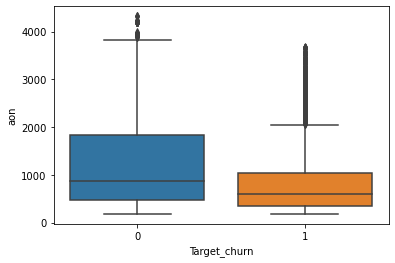

In [71]:
sns.boxplot(data=churn_newdf,y='aon',x='Target_churn')

In [72]:
htmap = churn_newdf.corr()
htmap

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,max_rech_data_6,max_rech_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_2g_6,arpu_2g_7,night_pck_user_6,night_pck_user_7,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,Target_churn,total_charge_mnth_6,total_charge_mnth_7,total_charge_mnth_8
arpu_6,1.000000,0.671846,0.612987,0.342260,0.215989,0.186672,0.509260,0.339561,0.285630,0.126893,0.083509,0.090328,0.196093,0.143347,0.124921,0.167210,0.127556,0.123628,0.332242,0.245107,0.218248,0.139404,0.114370,0.104217,0.047532,0.010440,0.012606,0.328905,0.246137,0.223297,0.273954,0.161416,0.133698,0.301526,0.181611,0.140215,0.066667,0.053517,0.043861,0.385718,0.230442,0.182271,0.467008,0.420852,0.413600,0.122595,0.068867,0.045086,0.054719,2.434622e-02,0.015483,0.554358,0.363330,0.302143,0.082688,0.062846,0.062760,0.188477,0.149110,1.241241e-01,0.051415,0.039162,0.037287,0.181713,0.142376,0.124100,0.088031,0.061527,0.056840,0.098709,0.065808,0.063078,0.034410,0.032510,0.022898,0.125032,0.085703,0.079458,0.225813,0.168902,0.150710,0.031316,-0.034175,-0.011413,0.103025,0.063114,0.070579,0.016130,0.023872,0.012220,0.349587,0.135940,0.119395,0.337938,0.262047,0.284594,0.266615,0.207485,0.199383,-0.109202,-0.175771,0.072743,-0.021833,-0.062502,-0.098918,-0.077884,0.152422,0.070134,0.084636,0.246331,0.116942,0.218435,0.094143,0.014145,-0.004984,-0.038924,-0.083953,-0.061163,-0.158638,-0.194203,-0.152276,0.176303,0.080919,0.103636,-0.002644,-0.025318,-0.017510,-0.120567,-0.197817,0.041525,0.058542,0.055092,0.112315,0.067672,0.419394,0.210553,0.207504
arpu_7,0.671846,1.000000,0.759924,0.211715,0.320643,0.270122,0.351859,0.490103,0.395775,0.092420,0.093685,0.093922,0.133450,0.179964,0.152156,0.106512,0.157765,0.135188,0.215368,0.303111,0.255917,0.111984,0.140880,0.121764,0.009023,0.040303,0.032772,0.213333,0.304366,0.255694,0.166831,0.260653,0.219759,0.203977,0.307736,0.239104,0.051645,0.070589,0.053712,0.248788,0.381601,0.305067,0.417053,0.508967,0.452407,0.067074,0.114900,0.070291,0.017842,2.608251e-02,0.017850,0.365494,0.535658,0.428937,0.045741,0.076428,0.073868,0.115963,0.171572,1.439143e-01,0.032430,0.047108,0.045923,0.109246,0.166322,0.144833,0.058663,0.084482,0.087379,0.069724,0.100070,0.090927,0.033057,0.042314,0.033212,0.087545,0.124294,0.117366,0.139667,0.212284,0.185383,0.007202,-0.015647,-0.007455,

<AxesSubplot:>

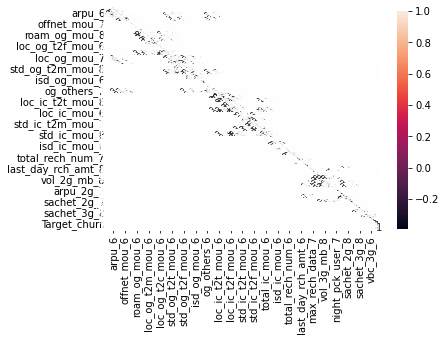

In [73]:
sns.heatmap(htmap, annot=True)

<AxesSubplot:xlabel='Target_churn'>

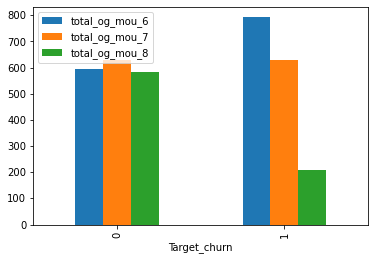

In [74]:
### Bivariate Analysis of the Target column with the total outgoing calls in the month of 6,7,8
churn_newdf.groupby(['Target_churn'])['total_og_mou_6','total_og_mou_7','total_og_mou_8'].mean().plot.bar()

<AxesSubplot:xlabel='Target_churn'>

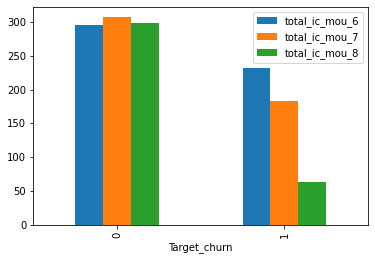

In [75]:
### Bivariate Analysis of the Target column with the total incoming calls in the month of 6,7,8
churn_newdf.groupby(['Target_churn'])['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8'].mean().plot.bar()

<AxesSubplot:xlabel='Target_churn'>

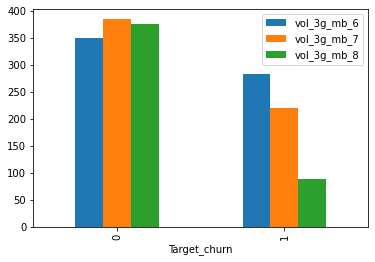

In [76]:
### Bivariate Analysis of the Target column with the 3G Data in the month of 6,7,8
churn_newdf.groupby(['Target_churn'])['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'].mean().plot.bar()

<AxesSubplot:xlabel='Target_churn'>

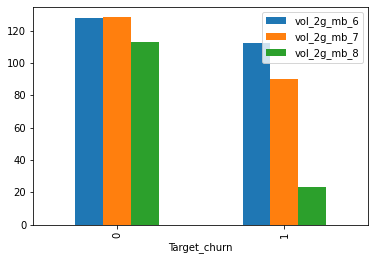

In [77]:
### Bivariate Analysis of the Target column with the 2G Data in the month of 6,7,8
churn_newdf.groupby(['Target_churn'])['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8'].mean().plot.bar()

- From the above bivariate analysis, it is clear that the Customers who are churning are more when the usage is reducing from month 6,7,8 gradually

<AxesSubplot:xlabel='Target_churn'>

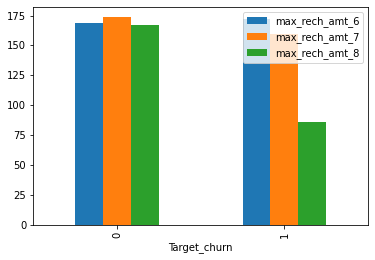

In [78]:
churn_newdf.groupby(['Target_churn'])['max_rech_amt_6','max_rech_amt_7','max_rech_amt_8'].mean().plot.bar()

<AxesSubplot:xlabel='Target_churn'>

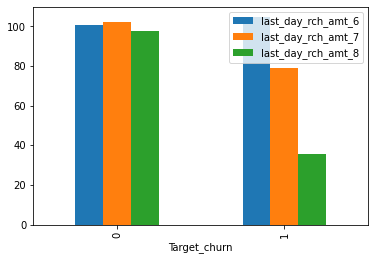

In [79]:
churn_newdf.groupby(['Target_churn'])['last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8'].mean().plot.bar()

- We can see a pattern where the customer have recharged less than before. Probably they have started partially switched to new service provider

#### Lets derive new features from given data

In [80]:
# lets now conevrt AON in months
churn_newdf['aon_mon'] = churn_newdf['aon']/30
churn_newdf.drop('aon', axis=1, inplace=True)
churn_newdf['aon_mon'].head()

0     32.266667
7     26.733333
8     10.500000
21    24.000000
23    20.133333
Name: aon_mon, dtype: float64

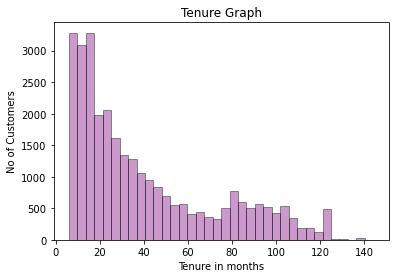

In [81]:
ax = sns.distplot(churn_newdf['aon_mon'], hist=True, kde=False, 
             bins=int(180/5), color = 'purple', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 10})
ax.set_ylabel('No of Customers')
ax.set_xlabel('Tenure in months')
ax.set_title('Tenure Graph')
plt.show()
# below graph simply shows the tenure of the customers

In [82]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
churn_newdf['tenure_range'] = pd.cut(churn_newdf['aon_mon'], tn_range, labels=tn_label)
churn_newdf['tenure_range'].head()

0         2-5 Yrs
7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

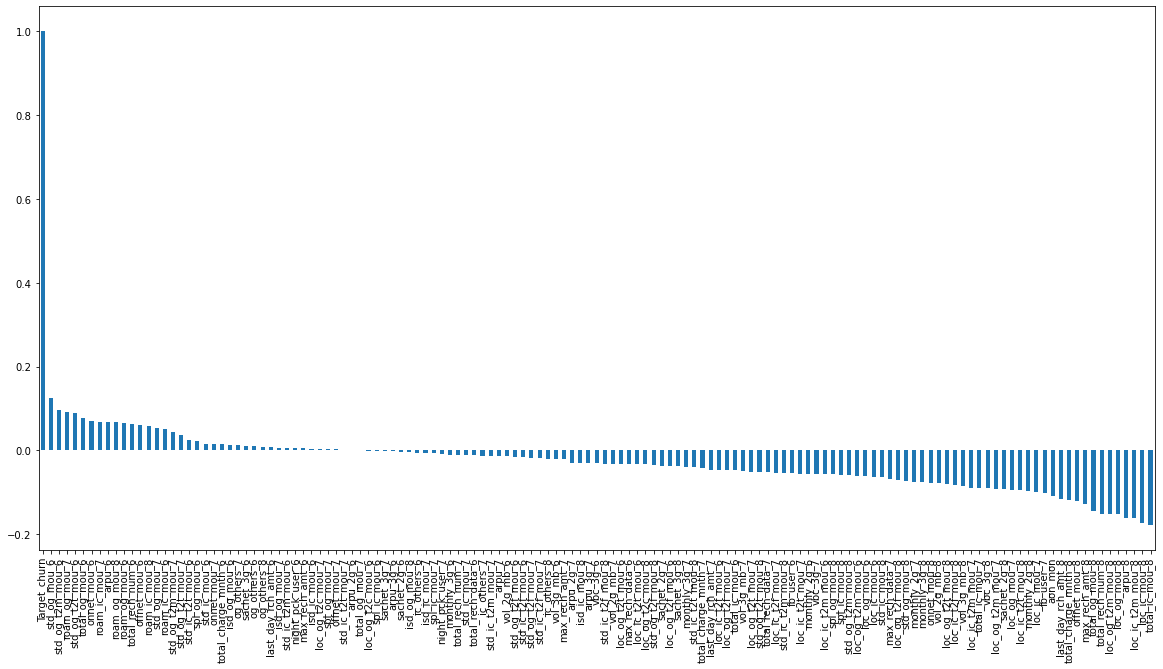

In [83]:
# lets check correlation of churn with other columns
plt.figure(figsize=(20,10))
churn_newdf.corr()['Target_churn'].sort_values(ascending = False).plot(kind='bar')
plt.show()

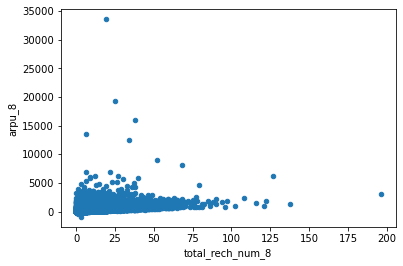

In [84]:
# lets plot total recharge and avg revenue for the 8th month
churn_newdf[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',
                                                              y='arpu_8')
plt.show()

#Target variable vs other important feature

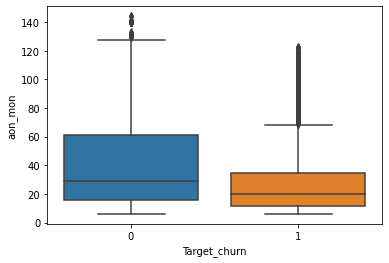

In [85]:
sns.boxplot(x = churn_newdf.Target_churn, y = churn_newdf.aon_mon)
plt.show()

## Data Modelling

In [86]:
new_df = churn_newdf
new_df.head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,max_rech_data_6,max_rech_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_2g_6,arpu_2g_7,night_pck_user_6,night_pck_user_7,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,vbc_3g_8,vbc_3g_7,vbc_3g_6,Target_churn,total_charge_mnth_6,total_charge_mnth_7,total_charge_mnth_8,aon_mon,tenure_range
0,2014-06-30,2014-07-31,2014-08-31,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,252,252,252,252,252,252,1.0,1.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,30.40,0.00,101.20,1,614.0,504.0,504.0,32.266667,2-5 Yrs
7,2014-06-30,2014-07-31,2014-08-31,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,57.74,19.38,18.74,1,1580.0,790.0,3638.0,26.733333,2-5 Yrs
8,2014-06-30,2014-07-31,2014-08-31,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,

- We will remove the date column from our analysis

In [87]:
### We dont need date columns for analysis, hence removing the columns
date_cols = list(new_df.select_dtypes(include=['datetime']).columns)
date_cols

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8']

In [88]:
new_df.drop(date_cols, axis=1, inplace=True)

In [89]:
new_df.drop(['tenure_range'], axis=1, inplace=True)

In [90]:
# Test - Train Split of the Data
X = new_df.drop(['Target_churn'], axis=1)
y = new_df['Target_churn']
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=100)

In [91]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,max_rech_data_6,max_rech_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_2g_6,arpu_2g_7,night_pck_user_6,night_pck_user_7,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_charge_mnth_6,total_charge_mnth_7,total_charge_mnth_8,aon_mon
16686,570.375,870.036,657.427,214.18,197.56,145.96,575.96,766.01,1211.56,265.86,538.43,0.00,406.18,759.93,0.00,9.06,16.98,72.49,61.84,17.14,185.83,42.43,1.48,6.09,0.0,1.00,8.43,113.34,35.61,264.43,148.53,42.78,73.46,120.58,125.24,958.33,1.50,0.0,53.69,270.61,168.03,1085.49,0.0,0.0,4.8,0.00,1.00,8.43,0.93,0.0,0.0,384.89,204.64,1363.16,0.70,0.55,0.00,122.64,30.54,78.03,14.78,0.00,41.96,138.13,31.09,119.99,4.20,7.14,61.39,41.04,20.03,215.19,0.00,0.00,3.91,45.24,27.18,280.51,183.38,78.33,494.41,0.00,0.00,0.11,0.0,20.04,93.78,0.00,0.00,0.0,6,9,9,128,128,144,128,128,130,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.00,0.00,0.0,692.0,1024.0,885.0,16.6
84709,767.361,149.368,26.508,373.13,61.74,4.11,778.64,146.41,2.69,0.00,2.09,7.11,0.00,1.00,6.81,57.68,2.09,0.00,69.54,6.09,0.00,3.75,0.00,0.00,0.0,0.21,0.00,130.98,8.19,0.00,315.44,59.64,0.00,697.76,118.49,0.00,7.58,0.0,0.00,1020.79,178.14,0.00,0.0,0.0,0.0,9.88,46.43,0.00,3.78,0.0,0.0,1165.44,232.78,0.00,222.14,188.34,0.00,49.24,39.06,0.00,2.96,0.70,0.00,274.36,228.11,0.00,30.43,12.06,0.00,92.11,200.64,0.00,45.31,11.55,0.00,167.86,224.26,0.00,442.66,461.33,0.00,0.03,0.00,0.00,0.0,0.00,0.00,0.40,8.95,0.0,12,11,4,110,50,30,50,7,30,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.00,0.00,0.0,820.0,164.0,30.0,6.3
33699,177.840,116.427,167.601,0.98,0.26,5.09,35.91,8.58,72.63,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.26,5.09,31.23,7.88,72.63,0.00,0.70,0.00,0.0,0.00,0.00,31.23,8.84,77.73,0.98,0.00,0.00,4.68,0.00,0.00,0.00,0.0,0.00,5.66,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.01,0.00,0.0,0.0,36.89,8.84,77.74,69.14,143.33,8.09,52.83,9.59,111.28,4.64,0.00,0.40,126.63,152.93,119.78,0.00,1.93,6.39,0.00,1.80,0.00,0.00,0.00,0.00,0.00,3.73,6.39,127.19,156.93,126.18,0.00,0.13,0.00,0.0,0.00,0.00,0.56,0.13,0.0,15,11,16,20,17,30,17,10,10,9.0,7.0,17.0,17.0,270.70,614.18,405.69,0.0,0.00,0.00,0.0,0.00,3.89,2.21,0.0,0.0,0,0,0,9,7,5,0,0,0,0,0,0,1.0,1.0,0.00,0.00,0.0,1529.0,972.0,820.0,29.5
2553

In [92]:
y_train.head()

16686    0
84709    0
33699    0
25535    0
49976    0
Name: Target_churn, dtype: int64

In [93]:
print(X_train.shape)
print(X_test.shape)

(20967, 136)
(8986, 136)


## Scaler - MinMax Scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

- Since the coefficient values are in different range, we need to bring it in a range of values. The values range should be in range of 0 to 1. The max value range should be 1. The target column doesnt require the scaling

In [94]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [95]:
## Train data transforming
X_train = scaler.fit_transform(X_train)

In [96]:
X_train[:5,:5]

array([[9.43348833e-02, 7.76127662e-02, 4.64848189e-02, 2.90346238e-02,
        2.46582900e-02],
       [1.00903317e-01, 5.82190539e-02, 2.81917081e-02, 5.05821701e-02,
        7.70602765e-03],
       [8.12459317e-02, 5.73325871e-02, 3.22826134e-02, 1.32850553e-04,
        3.24516876e-05],
       [1.09004973e-01, 7.55915809e-02, 5.23445849e-02, 2.07542387e-01,
        1.86756966e-01],
       [7.99654963e-02, 5.60034924e-02, 3.27001036e-02, 2.81426273e-03,
        1.08338711e-03]])

In [97]:
## Test data transforming

X_test = scaler.fit_transform(X_test)

## Applying PCA on the data with Random Forest Classifier

In [98]:
from sklearn.decomposition import PCA

In [99]:
### Checking the classfication count in the target variable
print(new_df[new_df['Target_churn'] == 0].shape[0])
print(new_df[new_df['Target_churn'] == 1].shape[0])


27520
2433


- We see that there is class imbalance in the target variable. We need to perform different techniques to fix the Class imbalance.

In [100]:
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.metrics import precision_score,f1_score
from sklearn.metrics import accuracy_score, confusion_matrix


In [101]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from collections import Counter


One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. 
SMOTE is the Synthetic Minority Oversampling Technique which is used for oversampling imbalanced classification datasets.
    - We will use this technique for our further analysis

In [102]:
#SMOTE
smote = SMOTE(random_state=2)
x_train_sm, y_train_sm = smote.fit_resample(X_train,y_train)
print("The number of classes after SMOTE fit {}".format(Counter(y_train_sm)))


The number of classes after SMOTE fit Counter({0: 19215, 1: 19215})


Near Miss is an Undersampling model. Undersampling refers to a group of techniques designed to balance the class distribution for a classification dataset that has a skewed class distribution.The major drawback of undersampling is that this method can discard potentially useful data that could be important for the induction process.
    - Hence not using this technique for our model

In [103]:
#Under Sampling
ns = NearMiss(0.8)
x_train_ns, y_train_ns = ns.fit_resample(X_train, y_train)
print("The number of classes after NearMiss fit {}".format(Counter(y_train_ns)))


The number of classes after NearMiss fit Counter({0: 2190, 1: 1752})


Class to perform random over-sampling.

Object to over-sample the minority class(es) by picking samples at random with replacement. The bootstrap can be generated in a smoothed manner.



In [104]:
os = RandomOverSampler(0.75)
x_train_os, y_train_os = os.fit_resample(X_train, y_train)
print("The number of classes after RandomOverSampler fit {}".format(Counter(y_train_os)))

The number of classes after RandomOverSampler fit Counter({0: 19215, 1: 14411})


In [105]:
sm = SMOTETomek(0.75)
x_train_smt, y_train_smt = sm.fit_resample(X_train, y_train)
print("The number of classes after SMOTETomek fit {}".format(Counter(y_train_smt)))

The number of classes after SMOTETomek fit Counter({0: 19206, 1: 14402})


In [106]:
dict_classifiers = {
    "BaggingClassifier": BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion = 'gini', random_state=1, max_depth = 3), n_estimators=50,random_state=1),
    "DecisionTreeClassifier": DecisionTreeClassifier(criterion = 'gini', random_state=1, max_depth = 3),
    "AdaBoosting": AdaBoostClassifier(n_estimators= 100, learning_rate=1, random_state=1),
    "GradiantBoostong": GradientBoostingClassifier(n_estimators = 50,random_state=1),
    "RandomForest": RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12,max_depth=3),
    "DecisionTree-Prunes": DecisionTreeClassifier(criterion = "entropy", random_state = 1,
                               max_depth=4, min_samples_leaf=5),
    "GradiantBoostong-Tuned": GradientBoostingClassifier(learning_rate=0.05, max_depth=8, max_features=0.3,
                           min_samples_leaf=100, n_estimators=300)
}

dict_classifiers_selected1 = {
    "DecisionTreeClassifier": DecisionTreeClassifier(criterion = 'gini', random_state=1, max_depth = 3),
    "BaggingClassifier": BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion = 'gini', random_state=1, max_depth = 3), n_estimators=50,random_state=1),
    "AdaBoosting": AdaBoostClassifier(n_estimators= 100, learning_rate=1, random_state=1),
    "GradiantBoosting": GradientBoostingClassifier(n_estimators = 50,random_state=1),
    "RandomForest": RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12,max_depth=3),
    "DecisionTree-Prunes": DecisionTreeClassifier(criterion = "entropy", random_state = 1,
                               max_depth=4, min_samples_leaf=5),
    "GradiantBoostong-Tuned": GradientBoostingClassifier(learning_rate=0.05, max_depth=8, max_features=0.3,
                           min_samples_leaf=100, n_estimators=300)

}

dict_classifiers_selected = {
    "RandomForest": RandomForestClassifier(
                             max_depth=3,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=120,
                             n_estimators=100,
                             random_state=100,oob_score=True)
}


- We have tried different classifers but finalized with Random Forest technique, We have removed other model analysis, since the execution time is more. We placed only with the final results which was Fine tuned

In [107]:
from numpy import argmax


def classify_and_score(xtrain,ytrain,xtest,ytest,classifier):
    no_classifiers = len(classifier.keys())
    plt.figure(figsize=(15, 15))
    
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,10)), columns = ['classifier', 'train_score', 'test_score', 'Train Recall', 'Test Recall','Train Precision','Test Precision','Train F1','Test F1',"ROC_AUC"])
    count = 0
    
    #ROC curve baseline
    ns_probs = [0 for _ in range(len(ytest))]
    ns_fpr, ns_tpr, _ = metrics.roc_curve(ytest, ns_probs)
    plt.subplot(2,1,1)
    plt.plot([0,1],[0,1],'r--')

    
    #Precision Recall curve baseline
    baseline_model = sum(ytest == 1) / len(ytest)
    plt.subplot(2,1,2)
    plt.plot([0, 1], [baseline_model, baseline_model], linestyle='--', label='Baseline model')

        
    for key, classifier in classifier.items():
        tmp = classifier.fit(xtrain, ytrain)
        
        y_train_predict = classifier.predict(xtrain)
        y_test_predict = classifier.predict(xtest)
    
        #Precision Recall curve
        probs_lr = classifier.predict_proba(xtest)[:, 1]
        precision_lr, recall_lr, thresholds = precision_recall_curve(ytest, probs_lr)
        auc_lr = auc(recall_lr, precision_lr)

        fscore = (2 * precision_lr * recall_lr) / (precision_lr + recall_lr)
        # locate the index of the largest f score
        ix = argmax(fscore)
        print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

        plt.subplot(2,1,2)
        plt.plot(recall_lr, precision_lr, label=f'AUC ${key} = {auc_lr:.2f}')
        plt.scatter(recall_lr[ix], precision_lr[ix], marker='o', color='black', label='Best')




        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = accuracy_score(ytrain,y_train_predict)
        df_results.loc[count,'test_score'] = accuracy_score(ytest, y_test_predict)
        df_results.loc[count,'Train Recall'] = recall_score(ytrain,y_train_predict)
        df_results.loc[count,'Test Recall'] = recall_score(ytest,y_test_predict)        
        df_results.loc[count,'Train Precision'] = precision_score(ytrain,y_train_predict)
        df_results.loc[count,'Test Precision'] = precision_score(ytest,y_test_predict)
        df_results.loc[count,'Train F1'] = f1_score(ytrain,y_train_predict)
        df_results.loc[count,'Test F1'] = f1_score(ytest,y_test_predict)     

        
        #ROC Recall curve
        fpr, tpr, thresholds = roc_curve(ytest, y_test_predict)
        roc_auc = auc(fpr,tpr)
        
        plt.subplot(2,1,1)
        plt.plot(fpr, tpr, marker='.', label=f'AUC ${key} = {roc_auc:.2f}')
      

        
        df_results.loc[count,'ROC_AUC'] =   roc_auc     
        count+=1
   
    plt.subplot(2,1,1)
    plt.title('ROC Curv', size=20)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend();

    plt.subplot(2,1,2)
    plt.title('Precision-Recall Curve', size=20)
    plt.xlabel('Recall', size=14)
    plt.ylabel('Precision', size=14)
    plt.legend();
    
    
    return df_results


Label encoded data set
-------------------------------------------
Best Threshold=0.292481, F-Score=0.607


,classifier,train_score,test_score,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1,ROC_AUC
0,RandomForest,0.941384,0.948364,0.481735,0.475771,0.724464,0.75174,0.578677,0.582734,0.731444


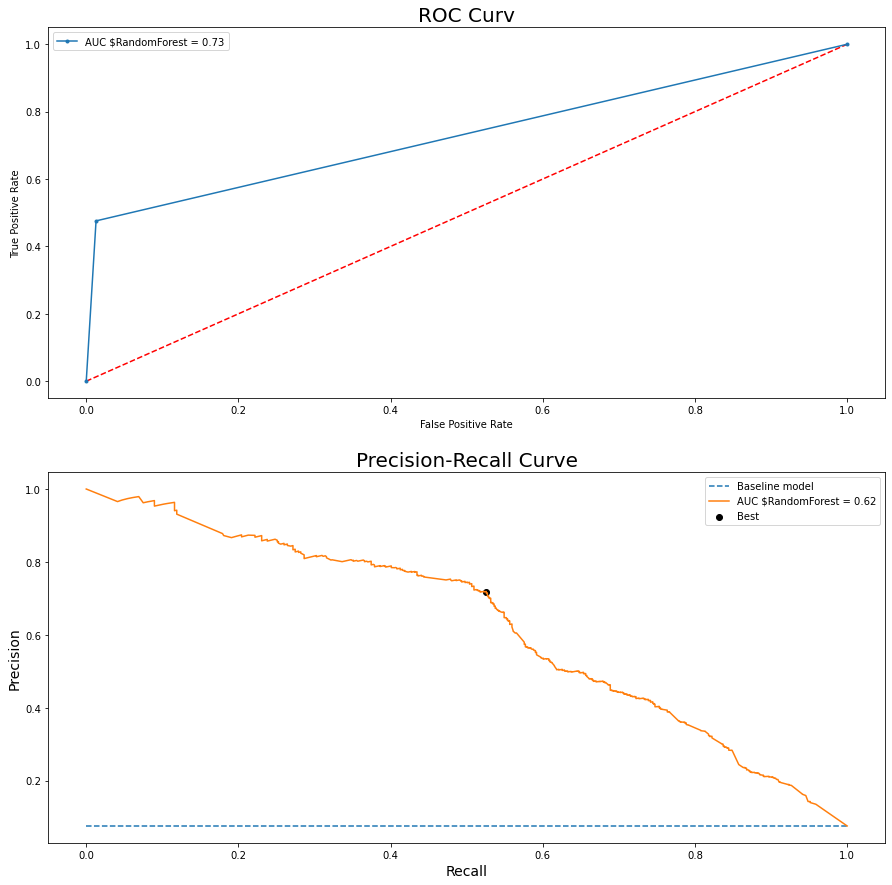

In [108]:
print("Label encoded data set")
print("-------------------------------------------")
res = classify_and_score(X_train, y_train,X_test, y_test,dict_classifiers_selected)
res

Label encoded data set
-------------------------------------------
Best Threshold=0.819168, F-Score=0.562


,classifier,train_score,test_score,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1,ROC_AUC
0,RandomForest,0.856883,0.860227,0.865262,0.787078,0.851001,0.32544,0.858072,0.460481,0.826651


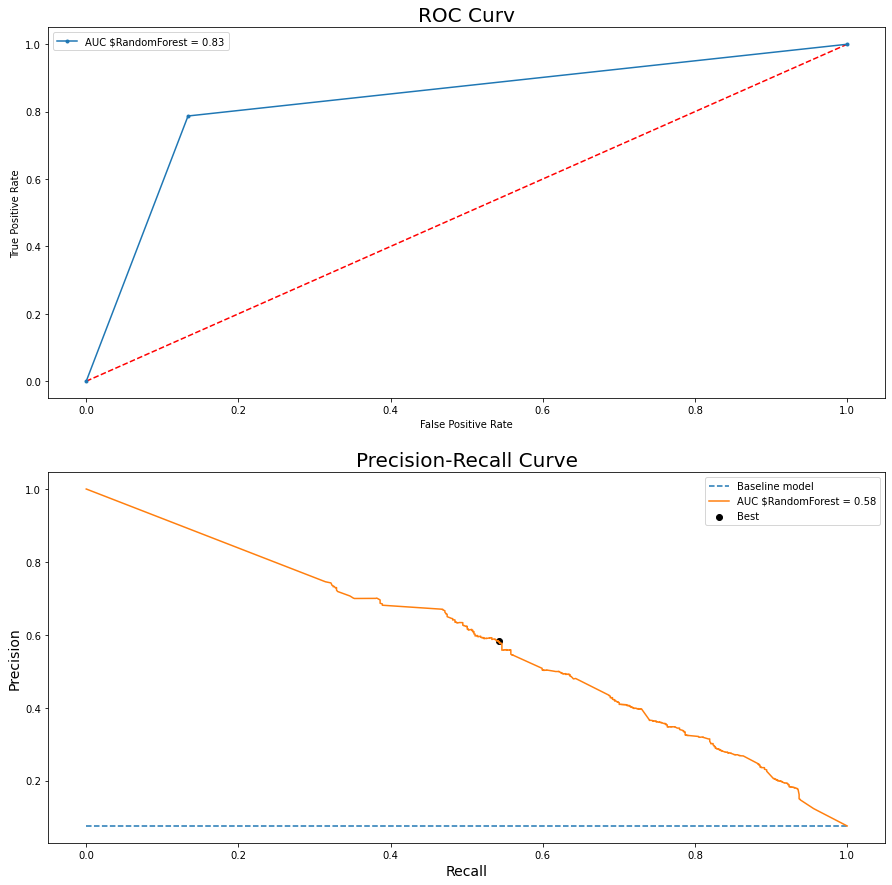

In [109]:
print("Label encoded data set")
print("-------------------------------------------")
res = classify_and_score(x_train_sm, y_train_sm,X_test, y_test,dict_classifiers_selected)
res

In [110]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(
                             max_depth=3,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=120,
                             n_estimators=100,
                             random_state=100,   
                            oob_score=True)

In [111]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, max_features=120, min_samples_leaf=100,
                       min_samples_split=100, oob_score=True, random_state=100)

In [112]:
rfc.oob_score_

0.9404778938331664

In [113]:
from sklearn.metrics import plot_roc_curve

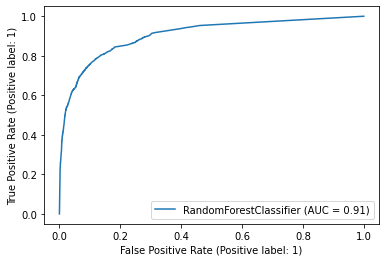

In [114]:
plot_roc_curve(rfc, X_train, y_train)
plt.show()

In [115]:
rfc_smote = RandomForestClassifier(
                             max_depth=3,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=120,
                             n_estimators=100,
                             random_state=100,   
                            oob_score=True)

In [116]:
rfc_smote.fit(x_train_sm,y_train_sm)

RandomForestClassifier(max_depth=3, max_features=120, min_samples_leaf=100,
                       min_samples_split=100, oob_score=True, random_state=100)

In [117]:
rfc_smote.oob_score_

0.8558417902680198

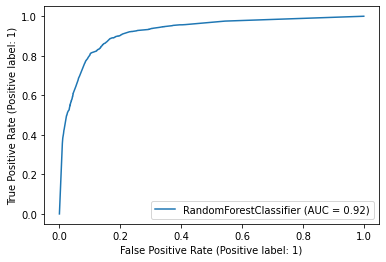

In [118]:
plot_roc_curve(rfc_smote, x_train_sm, y_train_sm)
plt.show()

RandomForestClassifier(max_depth=3, max_features=120, min_samples_leaf=100,
                       min_samples_split=100, oob_score=True, random_state=100)
- Random Forest classifer with the above configuration provides better AUC value in Test,Train split than the smotted data.
- X_Train AUC is 91% and smotted is 93%
- Lets perform some Hyperparameter tuning

#### Hyper-parameter tuning for the Random Forest Classifier

In [119]:
from sklearn.model_selection import GridSearchCV

In [120]:
params = {
    "max_depth": [12,14],
    "min_samples_leaf": [80,90],
    "min_samples_split": [90],
    "max_features": [12,15],
    "n_estimators" : [80,100]
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(x_train_sm, y_train_sm)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [12, 14], 'max_features': [12, 15],
                         'min_samples_leaf': [80, 90],
                         'min_samples_split': [90], 'n_estimators': [80, 100]},
             scoring='accuracy', verbose=1)

In [121]:
grid_search.best_score_

0.8962792084672856

In [122]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=12, max_features=15, min_samples_leaf=80,
                       min_samples_split=90, random_state=42)

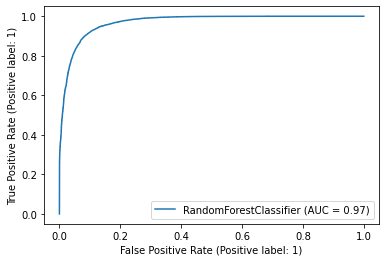

In [123]:
plot_roc_curve(rf_best, x_train_sm, y_train_sm)
plt.show()

In [124]:
rf_best.feature_importances_

array([1.09836433e-03, 2.85611970e-03, 7.15880222e-02, 1.11378754e-03,
       1.23363090e-03, 3.43530416e-03, 1.12917177e-03, 1.11673658e-03,
       5.35934200e-03, 1.14920632e-03, 4.86467024e-03, 7.30004852e-02,
       1.69313799e-03, 1.17498807e-02, 6.20877435e-02, 1.17395997e-03,
       1.21057060e-03, 1.53727351e-02, 8.70031380e-04, 1.12515036e-03,
       1.91711745e-02, 5.73504065e-04, 1.67272773e-03, 3.49975168e-03,
       5.21318414e-04, 3.40731540e-03, 2.79592659e-04, 1.24247035e-03,
       1.43010670e-03, 2.00707433e-02, 2.32209879e-03, 3.47318909e-03,
       1.21564608e-03, 2.72074750e-03, 3.11769102e-03, 7.74375465e-04,
       3.50065528e-04, 3.09790297e-04, 6.11618894e-05, 1.76035660e-03,
       4.43293038e-03, 2.54284185e-03, 6.00843823e-04, 2.14663085e-03,
       1.05227833e-03, 1.68381130e-03, 5.82096936e-03, 1.38083344e-03,
       7.36522364e-04, 0.00000000e+00, 0.00000000e+00, 1.07689208e-03,
       1.88436600e-03, 2.88117500e-02, 8.60417499e-04, 1.83695828e-03,
      

In [125]:
params = {
    "max_depth": [12,14],
    "min_samples_leaf": [80,90],
    "min_samples_split": [90],
    "max_features": [12,15],
    "n_estimators" : [80,100]
}
rf = RandomForestClassifier(random_state=42)
grid_search_norm = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search_norm.fit(X_train, y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [12, 14], 'max_features': [12, 15],
                         'min_samples_leaf': [80, 90],
                         'min_samples_split': [90], 'n_estimators': [80, 100]},
             scoring='accuracy', verbose=1)

In [126]:
grid_search_norm.best_score_

0.9409071098136585

In [127]:
rf_best_norm = grid_search.best_estimator_
rf_best_norm

RandomForestClassifier(max_depth=12, max_features=15, min_samples_leaf=80,
                       min_samples_split=90, random_state=42)

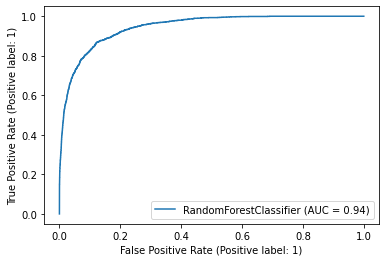

In [128]:
plot_roc_curve(rf_best_norm, X_train, y_train)
plt.show()

- After Hypertuning, the X_train has Accuracy score of 95% and smotted as 97%

### PCA application

In [129]:
#lets perform PCA on sampled data. import PCA
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [130]:
#lets fit PCA on the train dataset
pca.fit(x_train_sm)

PCA(random_state=42, svd_solver='randomized')

In [131]:
pca.components_

array([[-5.88089723e-03, -3.24500246e-03, -1.24007373e-03, ...,
         9.23757901e-03,  4.16406946e-03, -2.36094731e-03],
       [-6.49358713e-03,  6.46041618e-03,  4.73473850e-03, ...,
         1.56306606e-02,  4.07270251e-03,  1.39508914e-02],
       [ 2.10751844e-03,  4.48784366e-03,  1.19712851e-02, ...,
        -1.96148495e-03,  4.60767316e-03,  9.34475944e-01],
       ...,
       [-2.46822809e-08,  1.96525229e-07,  5.25022657e-07, ...,
        -6.48629091e-08, -2.83038366e-07, -3.77583161e-09],
       [-0.00000000e+00,  6.09283449e-16, -4.40494641e-16, ...,
         7.17235650e-16, -7.42665147e-16, -3.58214821e-17],
       [ 0.00000000e+00, -6.53787052e-15,  4.49524953e-15, ...,
        -3.08173224e-15,  6.33584325e-15,  4.90966731e-17]])

In [132]:
pca.explained_variance_ratio_

array([5.43616029e-01, 1.24728859e-01, 6.35535195e-02, 3.40768257e-02,
       2.52411112e-02, 2.32208428e-02, 1.94392711e-02, 1.65131768e-02,
       1.54478869e-02, 1.11031441e-02, 9.24067034e-03, 8.47094525e-03,
       7.74525818e-03, 7.16408155e-03, 5.75674327e-03, 5.28999969e-03,
       4.88233363e-03, 4.35055407e-03, 3.92931035e-03, 3.56873401e-03,
       3.34261587e-03, 3.15721686e-03, 3.10139450e-03, 3.02970962e-03,
       2.81056717e-03, 2.79499528e-03, 2.30962569e-03, 2.26051735e-03,
       2.20878225e-03, 1.85787324e-03, 1.79467983e-03, 1.71655894e-03,
       1.52479744e-03, 1.51192547e-03, 1.49757794e-03, 1.38703930e-03,
       1.36226919e-03, 1.25125052e-03, 1.14763083e-03, 1.08496948e-03,
       1.07236451e-03, 1.01180754e-03, 9.17715531e-04, 8.78162699e-04,
       8.45128841e-04, 8.05552713e-04, 7.81137490e-04, 7.63526156e-04,
       7.01677116e-04, 6.70769784e-04, 6.34714925e-04, 5.91953508e-04,
       5.51852934e-04, 5.42251327e-04, 5.31125133e-04, 5.09210452e-04,
      

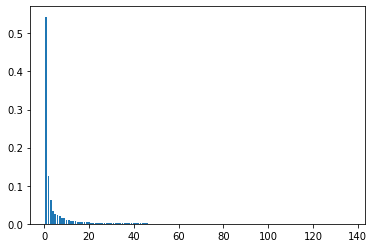

In [133]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.show()

In [134]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

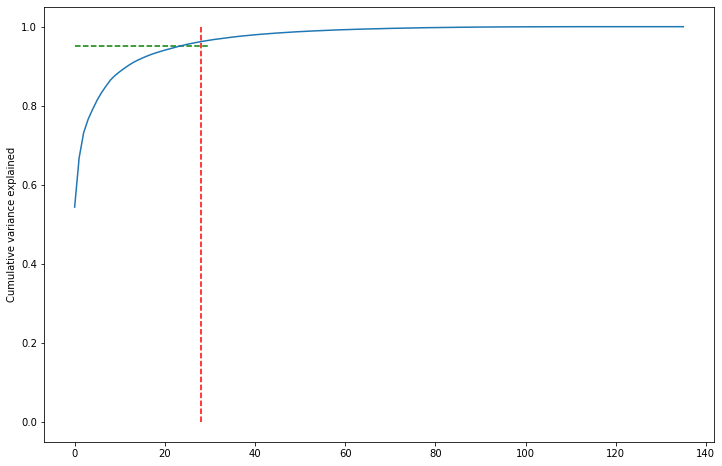

In [135]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=28, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

Lets perform PCA with 28 features

In [136]:
from sklearn.decomposition import IncrementalPCA

In [137]:
pca_final = IncrementalPCA(n_components=28)

In [138]:
df_train_pca = pca_final.fit_transform(x_train_sm)

In [139]:
df_train_pca.shape

(38430, 28)

In [140]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [141]:
corrmat.shape

(28, 28)

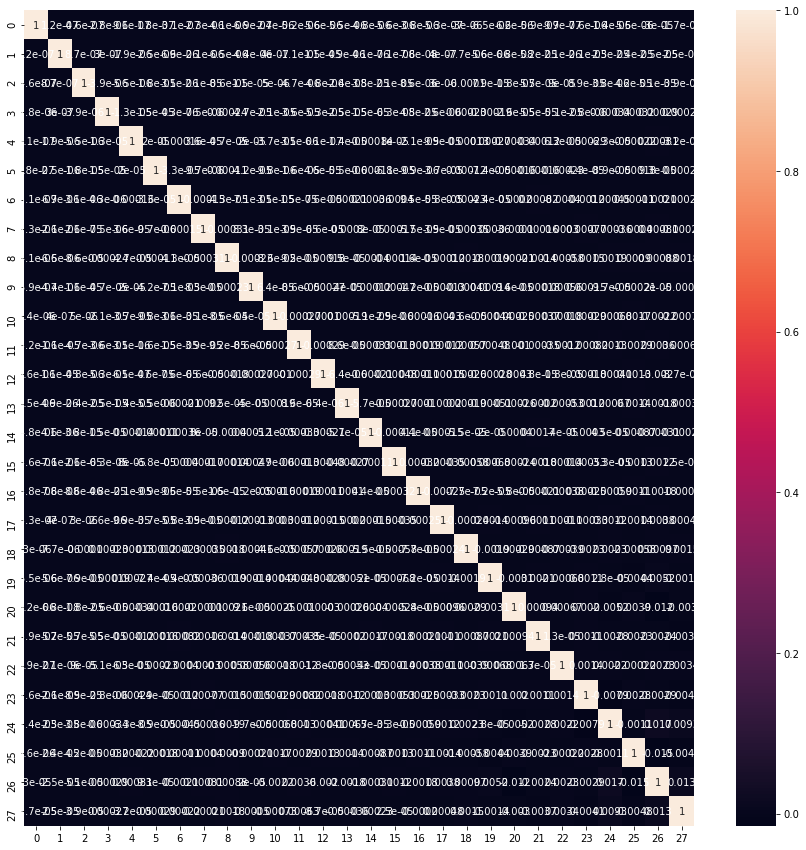

In [142]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)
plt.show()

In [143]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8986, 28)

In [144]:
learner_pca = RandomForestClassifier(max_depth=3,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=28,
                             n_estimators=100,
                             random_state=100,   
                                          oob_score=True)

In [145]:
model_pca = learner_pca.fit(df_train_pca, y_train_sm)

In [146]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [147]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.81'

In [148]:
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=3,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=25,
                             n_estimators=100,
                             random_state=100,   
                                          oob_score=True)

In [149]:
rf_pca=rfc.fit(df_train_pca,y_train_sm)
## Predict on train data set
rtrain_predictions = rf_pca.predict(df_train_pca)
rtrain_predprob = rf_pca.predict_proba(df_train_pca)[:,1]

In [150]:
# Confusion matrix for training
confusion = metrics.confusion_matrix(y_train_sm, rtrain_predictions)
TP = confusion[1,1] 
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]


In [151]:
# printing the scores
print ("Accuracy :",metrics.roc_auc_score(y_train_sm, rtrain_predictions))
print ("Recall/Sensitivity :",metrics.recall_score(y_train_sm, rtrain_predictions))
print('Specificity:',(TN / float(TN+FP)))
print ("AUC Score (Train):",metrics.roc_auc_score(y_train_sm, rtrain_predprob))
PCA_Train_Accuracy = metrics.roc_auc_score(y_train_sm, rtrain_predictions)
PCA_Train_Sensitivity = metrics.recall_score(y_train_sm, rtrain_predictions)
PCA_Train_Specificity = (TN / float(TN+FP))

Accuracy : 0.7521988030184751
Recall/Sensitivity : 0.8296643247462919
Specificity: 0.6747332812906583
AUC Score (Train): 0.8276529735387441


In [152]:
# result_df is created with the values
result_df = pd.DataFrame(columns=('Model', 'Accuracy', 'Sensitivity','Specificity'))
result_df.loc[0] = ['PCA_Train(RandomForest)',PCA_Train_Accuracy, PCA_Train_Sensitivity, PCA_Train_Specificity]
result_df

,Model,Accuracy,Sensitivity,Specificity
0,PCA_Train(RandomForest),0.752199,0.829664,0.674733


In [153]:
#predicting on test dataset
pred_probs_test = rf_pca.predict(df_test_pca)
# Confusion matrix for the test data
confusion = metrics.confusion_matrix(y_test, pred_probs_test)
TP = confusion[1,1] 
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
# Printing the scores
print("Roc_auc_score :",(metrics.roc_auc_score(y_test, pred_probs_test)))
print('precision score:',(metrics.precision_score(y_test, pred_probs_test)))
print('Sensitivity/Recall :',metrics.recall_score(y_test, pred_probs_test))
print('Specificity:',(TN / float(TN+FP)))
print("Accuracy :",(metrics.accuracy_score(y_test,pred_probs_test)))
PCA_Test_Accuracy = metrics.roc_auc_score(y_test, pred_probs_test)
PCA_Test_Sensitivity = metrics.recall_score(y_test, pred_probs_test)
PCA_Test_Specificity = (TN / float(TN+FP))

Roc_auc_score : 0.7441913077149533
precision score: 0.19248291571753987
Sensitivity/Recall : 0.7444933920704846
Specificity: 0.743889223359422
Accuracy : 0.7439350100155798


In [154]:
result_df.loc[1] = ['PCA_Test(RandomForest)',PCA_Test_Accuracy, PCA_Test_Sensitivity, PCA_Test_Specificity]
result_df

,Model,Accuracy,Sensitivity,Specificity
0,PCA_Train(RandomForest),0.752199,0.829664,0.674733
1,PCA_Test(RandomForest),0.744191,0.744493,0.743889


- From PCA analysis with 95% PCA, 
        - Train has sensitivity as 0.829
        - Test has sensitivity as 0.7444

# Logistic Regression

In [155]:
from sklearn.linear_model import LogisticRegression

In [156]:
# Logistice regression with the class_weight as Balanced for the class imbalance data
lr_model = LogisticRegression(class_weight='balanced')
lr_model.fit(df_train_pca,y_train_sm)

LogisticRegression(class_weight='balanced')

In [157]:
#ing on training set
train_pred = lr_model.predict(df_train_pca)
train_prob = lr_model.predict_proba(df_train_pca)[:,1]

In [158]:
## Confusion matrix for the Train data set
confusion = metrics.confusion_matrix(y_train_sm, train_pred)
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1]
FN = confusion[1,0]

In [159]:
# printing the scores
print ("Accuracy :",metrics.roc_auc_score(y_train_sm, train_pred))
print ("Recall/Sensitivity :",metrics.recall_score(y_train_sm, train_pred))
print ("Specificity :", (TN / float(TN+FP)))
print ("AUC Score (Train):",metrics.roc_auc_score(y_train_sm, train_prob))
Log_TAccuracy = metrics.roc_auc_score(y_train_sm, train_pred)
Log_TSensitivity = (TN / float(TN+FP))
Log_TSpecificity = metrics.roc_auc_score(y_train_sm, train_prob)


Accuracy : 0.8359875097580015
Recall/Sensitivity : 0.8651053864168619
Specificity : 0.8068696330991413
AUC Score (Train): 0.9045270884290094


In [160]:
## Logistic Train result in the Results dataframe
result_df.loc[2] = ['Logistic - Train',Log_TAccuracy, Log_TSensitivity, Log_TSpecificity]
result_df

,Model,Accuracy,Sensitivity,Specificity
0,PCA_Train(RandomForest),0.752199,0.829664,0.674733
1,PCA_Test(RandomForest),0.744191,0.744493,0.743889
2,Logistic - Train,0.835988,0.806870,0.904527


In [161]:
#predicting on test dataset.
test_prob = lr_model.predict(df_test_pca)
# Confusion matrix for the test data
confusion = metrics.confusion_matrix(y_test, test_prob)
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1]
FN = confusion[1,0]
#printing the scores
print("Roc_auc_score :",(metrics.roc_auc_score(y_test, test_prob)))
print('Sensitivity/Recall :',(metrics.recall_score(y_test, test_prob)))
print('Specificity:',(TN / float(TN+FP)))
print("Accuracy (Test)",(metrics.accuracy_score(y_test,test_prob)))
Log_TestAccuracy = metrics.roc_auc_score(y_test, test_prob)
Log_TestSensitivity = (TN / float(TN+FP))
Log_TestSpecificity = metrics.roc_auc_score(y_test,test_prob)


Roc_auc_score : 0.8231831398561277
Sensitivity/Recall : 0.7900146842878121
Specificity: 0.8563515954244431
Accuracy (Test) 0.8513242822167817


In [162]:
## Logistic Test in the resukt data frame
result_df.loc[3] = ['Logistic - Test',Log_TestAccuracy, Log_TestSensitivity, Log_TestSpecificity]
result_df

,Model,Accuracy,Sensitivity,Specificity
0,PCA_Train(RandomForest),0.752199,0.829664,0.674733
1,PCA_Test(RandomForest),0.744191,0.744493,0.743889
2,Logistic - Train,0.835988,0.806870,0.904527
3,Logistic - Test,0.823183,0.856352,0.823183


In [163]:
#lets check with different probability cutoff value 0.5
y_train_pred = lr_model.predict_proba(df_train_pca)[:,1]
y_train_pred_final = pd.DataFrame({'Churn':y_train_sm, 'Churn_Prob':y_train_pred})
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.119899,0
1,0,0.871751,1
2,0,0.252821,0
3,0,0.088541,0
4,0,0.066571,0


In [164]:
# Confusion Matrix for the Train data
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0]
# Printing the scores
print("Roc_auc_score :",metrics.roc_auc_score(y_train_pred_final.Churn, y_train_pred_final.predicted))
print('precision score :',(metrics.precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))
Log_Tune1TrainAccuracy = metrics.roc_auc_score(y_train_pred_final.Churn, y_train_pred_final.predicted)
Log_Tune1TrainSensitivity = (TP / float(TP+FN))
Log_Tune1TrainSpecificity = (TN / float(TN+FP))

Roc_auc_score : 0.8359875097580015
precision score : 0.8174977869578046
Sensitivity/Recall : 0.8651053864168619
Specificity: 0.8068696330991413
False Positive Rate: 0.1931303669008587
Positive predictive value: 0.8174977869578046
Negative Predictive value: 0.8567639257294429


In [165]:
# Result data frame is added with the Logistic Train data which is tuned with the cutoff as 0.5
result_df.loc[4] = ['Logistic - Train(Tuning 0.5)',Log_Tune1TrainAccuracy, Log_Tune1TrainSensitivity, Log_Tune1TrainSpecificity]
result_df

,Model,Accuracy,Sensitivity,Specificity
0,PCA_Train(RandomForest),0.752199,0.829664,0.674733
1,PCA_Test(RandomForest),0.744191,0.744493,0.743889
2,Logistic - Train,0.835988,0.806870,0.904527
3,Logistic - Test,0.823183,0.856352,0.823183
4,Logistic - Train(Tuning 0.5),0.835988,0.865105,0.806870


In [166]:
#lets define function for ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [167]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

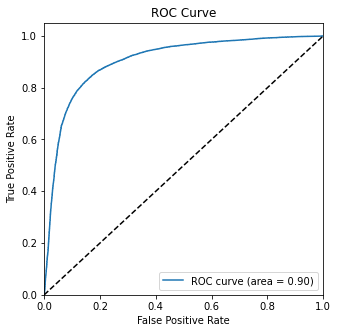

In [168]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [169]:
#lets predict on test datset with optimal cutoff obtained earlier
y_test_pred = lr_model.predict_proba(df_test_pca)[:,1]
y_test_pred_final = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_pred})
y_test_pred_final['Churn_Prob'] = y_test_pred
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

,Churn,Churn_Prob,predicted
48388,0,0.011386,0
29754,0,0.008094,0
50131,0,0.015549,0
66630,0,0.039380,0
91920,0,0.186595,0


In [170]:
# Confusion Matrix for the Test data
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted)
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
# Printing the scores
print("Roc_auc_score :",metrics.roc_auc_score(y_test_pred_final.Churn, y_test_pred_final.predicted))
print('precision score :',(metrics.precision_score(y_test_pred_final.Churn, y_test_pred_final.predicted)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))
Log_Tune1TestAccuracy = metrics.roc_auc_score(y_test_pred_final.Churn, y_test_pred_final.predicted)
Log_Tune1TestSensitivity = (TP / float(TP+FN))
Log_Tune1TestSpecificity = (TN / float(TN+FP))

Roc_auc_score : 0.8231831398561277
precision score : 0.31080300404390526
Sensitivity/Recall : 0.7900146842878121
Specificity: 0.8563515954244431
False Positive Rate: 0.1436484045755569
Positive predictive value: 0.31080300404390526
Negative Predictive value: 0.980289455547898


In [171]:
# Result data frame is added with the Logistic Test data which is tuned with the cutoff as 0.5

result_df.loc[5] = ['Logistic - Test(Tuning 0.5)',Log_Tune1TestAccuracy, Log_Tune1TestSensitivity, Log_Tune1TestSpecificity]
result_df

,Model,Accuracy,Sensitivity,Specificity
0,PCA_Train(RandomForest),0.752199,0.829664,0.674733
1,PCA_Test(RandomForest),0.744191,0.744493,0.743889
2,Logistic - Train,0.835988,0.806870,0.904527
3,Logistic - Test,0.823183,0.856352,0.823183
4,Logistic - Train(Tuning 0.5),0.835988,0.865105,0.806870
5,Logistic - Test(Tuning 0.5),0.823183,0.790015,0.856352


In [172]:
# Creating different columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.119899,0,1,1,0,0,0,0,0,0,0,0
1,0,0.871751,1,1,1,1,1,1,1,1,1,1,0
2,0,0.252821,0,1,1,1,0,0,0,0,0,0,0
3,0,0.088541,0,1,0,0,0,0,0,0,0,0,0
4,0,0.066571,0,1,0,0,0,0,0,0,0,0,0


In [173]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.673901  0.979079  0.368722
0.2   0.2  0.742675  0.961853  0.523497
0.3   0.3  0.788915  0.939422  0.638407
0.4   0.4  0.817330  0.904137  0.730523
0.5   0.5  0.835988  0.865105  0.806870
0.6   0.6  0.836222  0.799323  0.873120
0.7   0.7  0.811892  0.700234  0.923549
0.8   0.8  0.735779  0.513453  0.958106
0.9   0.9  0.598205  0.212698  0.983711


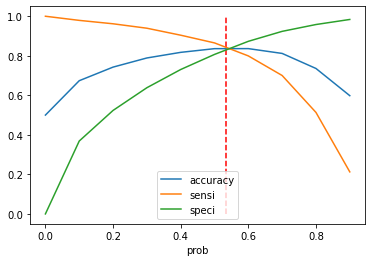

In [174]:
#Ploting the above accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.535, ymax=1, ymin=0, colors="r", linestyles="--")

plt.show()

In [175]:
#apply cutoff probability in the prediction
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.535 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.119899,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.871751,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.252821,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.088541,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.066571,0,1,0,0,0,0,0,0,0,0,0,0


In [176]:
#Predicting on train dataset with optimal cutoff probability
y_train_pred = lr_model.predict_proba(df_train_pca)[:,1]
y_train_pred_final = pd.DataFrame({'Churn':y_train_sm, 'Churn_Prob':y_train_pred})
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.535 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.119899,0
1,0,0.871751,1
2,0,0.252821,0
3,0,0.088541,0
4,0,0.066571,0


In [177]:
# Confusion Matrix for the Train data with optimal cutoff
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 
# Printing the scores
print("Roc_auc_score :",(metrics.roc_auc_score(y_train_pred_final.Churn, y_train_pred_final.predicted)))
print('precision score:',(metrics.precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))
Log_Tune2Accuracy = (metrics.roc_auc_score(y_train_pred_final.Churn, y_train_pred_final.predicted))
Log_Tune2Sensitivity = (TP / float(TP+FN))
Log_Tune2Specificity = (TN / float(TN+FP))

Roc_auc_score : 0.8376008326828001
precision score: 0.8334189967105263
Sensitivity/Recall : 0.843871975019516
Specificity: 0.8313296903460838
False Positive Rate: 0.16867030965391622
Positive predictive value: 0.8334189967105263
Negative Predictive value: 0.8418889006008222


In [178]:
## Result DF is added with the Logistic Train with optimal cutoff
result_df.loc[6] = ['Logistic - Train(Tuning 0.535)',Log_Tune2Accuracy, Log_Tune2Sensitivity, Log_Tune2Specificity]
result_df

,Model,Accuracy,Sensitivity,Specificity
0,PCA_Train(RandomForest),0.752199,0.829664,0.674733
1,PCA_Test(RandomForest),0.744191,0.744493,0.743889
2,Logistic - Train,0.835988,0.806870,0.904527
3,Logistic - Test,0.823183,0.856352,0.823183
4,Logistic - Train(Tuning 0.5),0.835988,0.865105,0.806870
5,Logistic - Test(Tuning 0.5),0.823183,0.790015,0.856352
6,Logistic - Train(Tuning 0.535),0.837601,0.843872,0.831330


In [179]:
#P redict on test datset with optimal cutoff
y_test_pred = lr_model.predict_proba(df_test_pca)[:,1]
y_test_pred_final = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_pred})
y_test_pred_final['Churn_Prob'] = y_test_pred
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.535 else 0)
y_test_pred_final.head()

,Churn,Churn_Prob,predicted
48388,0,0.011386,0
29754,0,0.008094,0
50131,0,0.015549,0
66630,0,0.039380,0
91920,0,0.186595,0


In [180]:
# Confusion Matrix for the Test data
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted)
TP = confusion[1,1]  
TN = confusion[0,0]
FP = confusion[0,1] 
FN = confusion[1,0] 
## Printing the scores
print("Roc_auc_score :",metrics.roc_auc_score(y_test_pred_final.Churn, y_test_pred_final.predicted))
print('precision score :',(metrics.precision_score(y_test_pred_final.Churn, y_test_pred_final.predicted)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))
Log_Tune2TestAccuracy = (metrics.roc_auc_score(y_test_pred_final.Churn, y_test_pred_final.predicted))
Log_Tune2TestSensitivity = (TP / float(TP+FN))
Log_Tune2TestSpecificity = (TN / float(TN+FP))

Roc_auc_score : 0.8209231209902212
precision score : 0.3287413901064496
Sensitivity/Recall : 0.7709251101321586
Specificity: 0.8709211318482841
False Positive Rate: 0.12907886815171585
Positive predictive value: 0.3287413901064496
Negative Predictive value: 0.9788875355257816


In [181]:
## Result DF is added with the Logistic Test with optimal cutoff

result_df.loc[7] = ['Logistic - Test(Tuning 0.535)',Log_Tune2TestAccuracy, Log_Tune2TestSensitivity, Log_Tune2TestSpecificity]
result_df

,Model,Accuracy,Sensitivity,Specificity
0,PCA_Train(RandomForest),0.752199,0.829664,0.674733
1,PCA_Test(RandomForest),0.744191,0.744493,0.743889
2,Logistic - Train,0.835988,0.806870,0.904527
3,Logistic - Test,0.823183,0.856352,0.823183
4,Logistic - Train(Tuning 0.5),0.835988,0.865105,0.806870
5,Logistic - Test(Tuning 0.5),0.823183,0.790015,0.856352
6,Logistic - Train(Tuning 0.535),0.837601,0.843872,0.831330
7,Logistic - Test(Tuning 0.535),0.820923,0.770925,0.870921


- In our scenario, we will not like any high value customer to churn so will try to find out all high value customers who may leave in future.
- So we need the <b> Recall/ Sensitivity </b> score to be better in our predictions.
    - Tuning with Random Forest PCA has the sensitivity values as 
        - Train 82.9% and Test 74.4%
    - Tuning with Logisitic Regression for 0.5 as threshold is given as:
        - Train 86.5% and Test as 79.0% 

##### We can consider using Logistic Regression. The Sensitivity can be improved using RFE and handling multicollinearity in the features.

#### Recommendations

 - The Total number of outgoing call reduces every month, then there can be a chance that the customer is already/ trying to switch to a new network.
 - The Total number of incoming call reduces every month, then there can be a chance that the customer is already/ trying to switch to a new network.
 - The Total number of data usage reduces every month, then it shows customer is not getting good speed of internet. If the internet speed is not good, the customer will look for new network provider and also he might not be recharging more.
 - In total, if the number of outgoing, incoming and data usage reduces drastically over months, then the chances of churning of the customer are more.
  